In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/Colab Notebooks/code_for_article1

/content/gdrive/My Drive/Colab Notebooks/code_for_article1


In [0]:
 ! pip install skrebate

  Created wheel for skrebate: filename=skrebate-0.6-cp27-none-any.whl size=29328 sha256=96d4a2e74e8ba3155075cc7972ab599c2101aec4ea08ff68e6cc4b2f586944fd
  Stored in directory: /root/.cache/pip/wheels/f5/99/36/c827bcfa6852c6d068895b2723c57cea84f93642270c6dc05c
Successfully built skrebate


In [0]:
ls

'Copy of GeneticClass_split.py'   Main_split.ipynb
'Copy of Main_split.ipynb'        myFeatureSelection/
'Copy of RAG.py'                  RAG.ipynb
 GeneticClass_split.py            RAG.py
 GeneticClass_split.pyc           RAG.pyc
 IntegrationDS.ipynb              randomSelection.ipynb


In [0]:
import GeneticClass_split as GN
from numpy.random import choice
import matplotlib.pyplot as plt
import operator
import random

def InitialPopulation(number):
    population = list()
    for i in range(number):
        individual = GN.Individual()
        population.append(individual)
    return population
  
def InitialSpecifyPopulation(number):
    pop = [[3,'P', 12241 , 'A', 4456, 'RF' , 20],
           [3, 'M', 10874, 'R', 1618, 'R', 38],
           [3,'M', 11313 , 'G', 3218, 'RF' , 18],
           [3, 'R', 14132 , 'A', 2032 , 'G' , 25],
           [3,'R', 12241 , 'A', 4456, 'G' , 20],
           [3,'R', 7825, 'A', 3465, 'G' , 24]]
                                                                                    
    population = list()
    for i in range(len(pop)):
        individual = GN.Individual(pop[i])
        population.append(individual)

    for i in range(number-len(pop)):
        individual = GN.Individual()
        population.append(individual)
    return population


def FitnessSorted(individuals):
    fitness = list()
    n = 1
    for individual in individuals:
        print n," )",individual.chromosome
        fit , selectedF = individual.Fitness()
        fitness.append(fit[0])
        print "on train: "
        print fit[0]
        print "on test: "
        print fit[1]
        print "Selected Feature: ",selectedF
        print
        n+=1 
      
    dict_indiFit = dict(zip(individuals[:],fitness[:]))
    return sorted(dict_indiFit.items(), key=operator.itemgetter(1))
  

def FitnessSortedChild(individuals):
    fitness = list()
    n = 1
    for individual in individuals:
        print n," child )",individual.chromosome
        fit , selectedF = individual.Fitness()
        fitness.append(fit[0])
        print "on train: "
        print fit[0]
        print "on test: "
        print fit[1]
        print "Selected Feature: ",selectedF
        print
        n+=1
      
    dict_indiFit = dict(zip(individuals[:],fitness[:]))
    return sorted(dict_indiFit.items(), key=operator.itemgetter(1))
  

def CalProbability(dic_individualFitness):
    probability , prob = list() , list()
    total = 0
    key = list()
    for item in dic_individualFitness:
        key.append(item[0])
        total = total + (1/item[1])
        prob.append(1/item[1])

    for fit in prob:
        probability.append(fit/total)
    dict_indiProb = dict(zip(key,probability))
    # sorted = sorted(dict_indiProb.items(), key=operator.itemgetter(1) , reverse = True)
    return dict_indiProb


def Selection(popRanked, eliteSize):
    selectionResults = []
    probs = CalProbability(popRanked)
    bestParent = []
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
        bestParent.append(popRanked[i])
    remain = choice(probs.keys(),len(popRanked) - eliteSize , p = probs.values())
    
    for i in range(len(popRanked) - eliteSize):
        selectionResults += [remain[i]]
    return selectionResults,bestParent

def getKey(item):
    return item[1]
  
def BreedPopulation(matingpool, bestparent, eliteSize, mutationRate):
    childrens = []
    length = len(matingpool)
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0, eliteSize):
        childrens.append(bestparent[i])
    tempChild = list()
    for i in range(0, length,2):
        child1 , child2 = pool[i].Crossover(pool[i+1])
        tempChild.append(child1)
        tempChild.append(child2)
    mutateChild = MutatePopulation(tempChild, mutationRate)
    childRank = FitnessSortedChild(mutateChild)
    temp = childRank[:length-eliteSize]
    for item in temp:
        childrens.append(item)
      
    nextGeneration = sorted(childrens, key=getKey)
    return nextGeneration


def MutatePopulation(population, mutationRate):
    mutatedPop = []

    for indi in population:
        mutatedInd = indi.Mutation(mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


def NextGeneration(currentGen, eliteSize, mutationRate,k):
    popRanked = currentGen
    matingpool , bestParent = Selection(popRanked, eliteSize)
    print k," generation"
    popRankedNext = BreedPopulation(matingpool, bestParent,eliteSize, mutationRate)
    return popRanked,popRankedNext
  

def FirstGeneration(currentGen, eliteSize, mutationRate):
    popRanked = FitnessSorted(currentGen)
    matingpool , bestParent = Selection(popRanked, eliteSize)
    print 2,' childeren generation'
    popRankedNext = BreedPopulation(matingpool, bestParent,eliteSize, mutationRate)
    return popRanked,popRankedNext


def geneticAlgorithmPlot(popSize, eliteSize, mutationRate, generations):
    #pop = InitialPopulation(popSize)
    pop = InitialSpecifyPopulation(popSize)
    progressBest = []
    progressWorst = []
    progressMean = []
    print 1," generation"
    fitness , current = FirstGeneration(pop, eliteSize, mutationRate)
    n = 1
    print "****************************************************************"
    for indi in current:
        print n,"  ) ",indi[1], "  ---> ",indi[0].chromosome
        n+=1
    progressBest.append(fitness[0][1])
    progressWorst.append(fitness[-1][1])
    sum = 0
    for i in range(0, popSize):
        sum += fitness[i][1]
    mean = sum / popSize
    progressMean.append(mean)
    x = [1]
    
    for i in range(2, generations+1):
        x.append(i)
        fitness , current = NextGeneration(current, eliteSize, mutationRate,i)
        n = 1
        print "****************************************************************"
        for indi in current:
            print n,"  ) ",indi[1], "  ---> ",indi[0].chromosome
            n+=1
    
        progressBest.append(fitness[0][1])
        progressWorst.append(fitness[-1][1])
        sum = 0
        for i in range(0, popSize):
            sum += fitness[i][1]
        mean = sum / popSize
        progressMean.append(mean)

        print "#################################################################"
    

    progressBest.append(current[0][1])
    progressWorst.append(current[-1][1])
    sum = 0
    for i in range(0, popSize):
        sum += current[i][1]
    mean = sum / popSize
    progressMean.append(mean)

    print "progressBest = ",progressBest
    print "progressWorst = ",progressWorst
    print "progressMean = ",progressMean
    plt.plot(x , progressBest , color='green') 
    plt.ylabel('MAD')   
    plt.xlabel('Generation')
    plt.plot(x , progressWorst , color='red') 
    plt.ylabel('MAD')
    plt.xlabel('Generation')
    plt.plot(x , progressMean , color='blue') 
    plt.ylabel('MAD')
    plt.xlabel('Generation')
    plt.show();
    plt.savefig('result.png')
    bestObj = current[0][0]
    bestMethod = bestObj.chromosome
    bestMAD = current[0][1]
    return bestMethod,bestMAD



bestInd , bestMAD = geneticAlgorithmPlot(popSize=30, eliteSize=4, mutationRate=0.38, generations=50)
print "best chromosom in final generation: " ,bestInd 
print "Best MAD: ", bestMAD



DataSet  DS097_270  :  [ column: 21291  , Row: 398 ]
DataSet  DS236_270  :  [ column: 21291  , Row: 93 ]
DataSet  DS242_270  :  [ column: 21291  , Row: 50 ]
DataSet  DS317_270  :  [ column: 21291  , Row: 168 ]
DataSet  DS642_270  :  [ column: 21291  , Row: 123 ]
DataSet  DS869_270  :  [ column: 21291  , Row: 24 ]
DataSet  DS257_270  :  [ column: 21291  , Row: 84 ]
DataSet  DS008_270  :  [ column: 21291  , Row: 92 ]
DataSet  DS149_450  :  [ column: 21291  , Row: 71 ]
DataSet  DS169_450  :  [ column: 21291  , Row: 95 ]
DataSet  DS638_450  :  [ column: 21291  , Row: 16 ]
DataSet  DS812_270  :  [ column: 21291  , Row: 48 ]
DataSet  DS064_450  :  [ column: 21291  , Row: 78 ]
DataSet  DS870_450  :  [ column: 21291  , Row: 40 ]
DataSet  DS128_450  :  [ column: 21291  , Row: 43 ]
DataSet  DS279_450  :  [ column: 21291  , Row: 656 ]
[ column: 21291  , Row: 2079 ]
1  generation
1  ) [3, 'P', 12241, 'A', 4456, 'RF', 20]
on train: 
4.187547194658918
on test: 
4.02733687999933
Selected Feature:  [1

No handlers could be found for logger "concurrent.futures"


KeyboardInterrupt: ignored

In [4]:
import myFeatureSelection as FS
import numpy as np
import pandas as pd

X, Y , Xt , Yt ,colName = FS.Preprocces.getPreProcData()

ret_f = colName[:]
#next = [3, 'R', 4809, 'A', 4026, 'G', 52]
best = [4, 'F', 12424, 'R', 8661, 'A', 3375, 'G', 26]
#individual = GN.Individual(best)
x_data = X[:]
for i in range(1,best[0]*2,2):

    if best[i] == 'R':
        ret_f = FS.Filters.relief(x_data, Y, best[i+1],ret_f) 
        print "r"
        print ret_f
    
    if best[i] == 'G':
        ret_f = FS.Embeddeds.FIGBR(x_data,Y,best[i+1],ret_f) 
        print "g"
        print ret_f
        
    if best[i] == 'A':
        ret_f = FS.Embeddeds.FIAdaBoost(x_data, Y,best[i+1],ret_f)      
        print "a"
        print ret_f
        
    if best[i] == 'P':
        ret_f, _ = FS.Filters.myPearson(x_data, Y,best[i+1],ret_f)
        print "p"
        ret_f = ret_f.tolist()
        print ret_f
        
    if best[i] == 'F':
        ret_f = FS.Filters.FRegression(x_data, Y,best[i+1],ret_f)
        print "f"
        ret_f = ret_f.tolist()
        print ret_f
        
    if best[i] == 'M':
        ret_f = FS.Filters.MutualInfoRegression(x_data, Y,best[i+1],ret_f)   
        print "m"
        ret_f = ret_f.tolist()
        print ret_f
        
    if best[i] == 'RF':
        ret_f = FS.Embeddeds.FIRF(x_data, Y,best[i+1],ret_f)
        print "rf"
        print ret_f
        
    if best[i] == 'E':
        ret_f = FS.Embeddeds.FIExtra(x_data, Y,best[i+1],ret_f)
        print "rf"
        
        print ret_f


Params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
              'subsample':0.6, 'verbose':0, 'warm_start':True, 'alpha':0.6,
              'learning_rate': 0.03, 'loss': 'lad'}

Xnew = X.iloc[:,ret_f] 
xt = Xt.iloc[:,ret_f]
print ret_f
scoreCV = FS.Evaluations.GBR_with_MAD_CV(Xnew,Y,xt,Yt,Params,cv=3)
print "on train: ",scoreCV[0]
print "on test: ",scoreCV[1]

score = FS.Evaluations.GBR_with_MAD(Xnew,Y,xt,Yt,Params)
print "on train: ",score[0]
print "on test: ",score[1]

# Xnew = x_data.iloc[:,ret_f] 
# #xt = Xt.iloc[:,ret_f]
# #print ret_f
# score = FS.Evaluations.GBR_with_MAD_CV(Xnew,Y,xt,Yt,Params,cv=3)
         
# print score

DataSet  DS097_270  :  [ column: 21291  , Row: 398 ]
DataSet  DS236_270  :  [ column: 21291  , Row: 93 ]
DataSet  DS242_270  :  [ column: 21291  , Row: 50 ]
DataSet  DS317_270  :  [ column: 21291  , Row: 168 ]
DataSet  DS642_270  :  [ column: 21291  , Row: 123 ]
DataSet  DS869_270  :  [ column: 21291  , Row: 24 ]
DataSet  DS257_270  :  [ column: 21291  , Row: 84 ]
DataSet  DS008_270  :  [ column: 21291  , Row: 92 ]
DataSet  DS149_450  :  [ column: 21291  , Row: 71 ]
DataSet  DS169_450  :  [ column: 21291  , Row: 95 ]
DataSet  DS638_450  :  [ column: 21291  , Row: 16 ]
DataSet  DS812_270  :  [ column: 21291  , Row: 48 ]
DataSet  DS064_450  :  [ column: 21291  , Row: 78 ]
DataSet  DS870_450  :  [ column: 21291  , Row: 40 ]
DataSet  DS128_450  :  [ column: 21291  , Row: 43 ]
DataSet  DS279_450  :  [ column: 21291  , Row: 656 ]
[ column: 21291  , Row: 2079 ]
f
[0, 1, 6, 7, 10, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 39, 40, 41, 43, 47, 48, 49, 50, 51, 55, 56

In [0]:

import numpy 
r = [19325, 10900, 7755, 14860, 14515, 4010, 6577, 6842, 4264, 6801, 15094, 18293, 21199, 18877, 3952, 14007, 18670, 14494, 1567, 2409, 4343, 12367, 18539, 14912, 1878, 19336, 2508, 19369, 8027, 11755, 19932, 13622, 14329, 12295, 5726, 14060, 19846, 14839, 17147, 4457, 13606, 1538, 4887, 4712, 16241, 8141, 10807, 15652, 4225, 12399, 15230, 2130, 1299, 9640, 10561, 19347, 3329, 14227, 10674, 20717, 2965, 17590, 6369, 6741, 428, 7609, 8794, 18602, 1648, 17572, 71, 6344, 3175, 2868, 1249, 7963, 5167, 7721, 10257, 10102, 10897, 12924, 3533, 1470, 10665, 475, 19655, 17756, 7074, 18583, 16965, 8914, 15232, 8570, 13986, 11349, 14321, 21272, 10398, 16375, 10689, 1072, 5674, 12598, 3996, 16394, 5744, 10787, 3989, 2501, 19981, 18585, 134, 21184, 7568, 13629, 8063, 4355, 5599, 4472, 7009, 7394, 15540, 19842, 2055, 12476, 5453, 9093, 15589, 4828, 4053, 20030, 9399, 17906, 79, 10823, 14029, 12363, 20791, 14308, 8722, 13604, 4372, 14590, 20246, 12923, 8429, 1122, 18066, 11001, 10184, 612, 20880, 6352, 12090, 9472, 8598, 19098, 18846, 14200, 10525, 3177, 16677, 18890, 2328, 17759, 1090, 15375, 2094, 7338, 8271, 7993, 1321, 19357, 18310, 4012, 7200, 5646, 15450, 19373, 13336, 15143, 10044, 1396, 5298, 801, 8822, 16324, 18713, 16097, 12780, 14018, 17258, 14729, 18864, 8816, 10222, 15679, 20093, 5017, 19759, 9079, 6647, 7948, 8105, 10950, 4583, 20874, 11764, 12868, 21284, 9289, 10625, 657, 6688, 7557, 8256, 8162, 15040, 10450, 2436, 12471, 15587, 9065, 2052, 18114, 7165, 2352, 14951, 20298, 7480, 13826, 2930, 7346, 21111, 15426, 19527, 250, 6778, 19311, 236, 20320, 10166, 15302, 5072, 19976, 16766, 9563, 8955, 18073, 7657, 3939, 18926, 12691, 9263, 14859, 7898, 3219, 19239, 8838, 212, 7544, 10397, 4754, 13474, 19500, 6527, 15509, 16176, 4687, 15566, 10463, 14764, 7556, 12381, 733, 9257, 2901, 8095, 1638, 2858, 3265, 7626, 811, 1894, 6963, 3009, 10478, 20920, 6042, 14042, 13818, 4651, 448, 13647, 21218, 18871, 344, 13705, 3940, 6625, 66, 19272, 8517, 3876, 4603, 16083, 9155, 2445, 8448, 7063, 12372, 1758, 11318, 10970, 10778, 4452, 12554, 11185, 2752, 20472, 9916, 18402, 10915, 8984, 13674, 8805, 3377, 18380, 20182, 19921, 17915, 11751, 16924, 15572, 8968, 5886, 8231, 7952, 112, 7959, 949, 5036, 16883, 188, 18325, 19426, 11706, 18305, 15543, 9594, 4418, 1287, 8526, 238, 6784, 6252, 12799, 1597, 17181, 17277, 2580, 11057, 4074, 17955, 13704, 905, 15692, 3567, 336, 17500, 19725, 1688, 11415, 12697, 14082, 207, 3068, 28, 20170, 9590, 7497, 19985, 9699, 17492, 5952, 831, 11897, 8944, 20013, 16632, 15255, 292, 16656, 11411, 3936, 17993, 1261, 9988, 14358, 5562, 20603, 10216, 21208, 95, 409, 9945, 19534, 14469, 13100, 1190, 7199, 5537, 15808, 8954, 8024, 6017, 15238, 16215, 5961, 1512, 15816, 9228, 13737, 15936, 16899, 9262, 7355, 12895, 6727, 17616, 19993, 6071, 17464, 16494, 4465, 12601, 815, 14198, 5953, 20524, 11033, 4090, 3799, 7485, 19279, 17477, 4119, 16197, 9663, 6976, 12216, 65, 16553, 20637, 12388, 9934, 4280, 16395, 4390, 5922, 10236, 11220, 16728, 19515, 11214, 11107, 1346, 13859, 9634, 10118, 19614, 10290, 17075, 11386, 6685, 3093, 15715, 13815, 10448, 16669, 19845, 5906, 6366, 10108, 12714, 20991, 10982, 16352, 13137, 19257, 15817, 16040, 14824, 19594, 12076, 19504, 19570, 8458, 13523, 2627, 5526, 18321, 12077, 7237, 12552, 1095, 9686, 14278, 5816, 16856, 1153, 20693, 7750, 17882, 19012, 1583, 16156, 11742, 20353, 11510, 20051, 4421, 5074, 15187, 8313, 7611, 365, 19108, 11384, 1156, 11778, 14225, 18158, 3823, 3516, 899, 8145, 1365, 2532, 17536, 14522, 2511, 2329, 5901, 15491, 12974, 17108, 4112, 6068, 1932, 18177, 9698, 4546, 18744, 10227, 7749, 16592, 19606, 6848, 18803, 4433, 5445, 18256, 2784, 15270, 13762, 12631, 1622, 8939, 5424, 3848, 3502, 4051, 9669, 8586, 13597, 11437, 6679, 20800, 494, 6038, 10922, 12858, 12153, 13248, 20963, 17413, 4645, 9126, 20987, 12199, 13550, 19927, 3649, 4082, 6024, 15707, 7493, 11002, 3441, 14002, 19289, 16567, 21281, 13653, 19276, 13055, 15876, 20252, 16209, 3431, 14965, 2860, 4623, 3345, 6239, 12600, 11053, 411, 18976, 17059, 20656, 5789, 20242, 6587, 15905, 3814, 8735, 7395, 1149, 6524, 12157, 7587, 4436, 12181, 20129, 19062, 11934, 4859, 10928, 2837, 14269, 5670, 3855, 17014, 14714, 9987, 16878, 11289, 6825, 8672, 16654, 12359, 10243, 8384, 12138, 2683, 17435, 3783, 8530, 3829, 9831, 16697, 14592, 4187, 18905, 18436, 11323, 1174, 4001, 14769, 17555, 1863, 13017, 20032, 12299, 20593, 11034, 3292, 20649, 3451, 4394, 10080, 15444, 4326, 17644, 5388, 14979, 8025, 6399, 6015, 7610, 15195, 20665, 2070, 11630, 20256, 10577, 17757, 10202, 18838, 14562, 10357, 20725, 4908, 16498, 15322, 16454, 17800, 13070, 10100, 6391, 574, 11736, 10833, 5262, 5556, 10319, 11723, 11178, 5819, 14770, 12682, 14733, 4466, 9830, 19979, 10842, 15312, 11211, 7607, 6004, 3332, 15669, 4176, 13170, 4400, 11992, 17231, 1719, 2031, 11859, 14724, 14475, 143, 274, 13744, 18977, 1559, 16134, 5911, 1805, 18849, 7231, 14238, 14057, 20007, 10253, 3764, 21000, 14868, 7129, 8942, 7680, 14301, 19884, 10542, 5058, 15177, 20500, 4850, 18754, 4527, 2844, 11335, 12168, 7734, 19418, 2841, 20734, 4655, 7842, 20645, 15481, 15532, 12124, 4617, 8412, 413, 20448, 20867, 16958, 5772, 15850, 5330, 19249, 14443, 11259, 4405, 2204, 20617, 1720, 9743, 677, 5014, 9279, 14041, 13843, 18974, 628, 6980, 4287, 20435, 5721, 34, 7366, 9569, 17316, 18701, 7776, 2655, 14570, 5878, 15447, 8808, 17204, 15123, 13363, 9992, 15229, 2095, 3459, 16027, 3137, 1730, 20381, 16346, 7536, 15519, 18088, 6725, 20132, 4333, 9274, 21068, 9434, 3148, 11020, 5349, 16107, 7302, 16053, 3325, 18374, 14439, 4628, 12939, 12108, 6432, 18604, 5360, 839, 14942, 19577, 16898, 11579, 14264, 8606, 19654, 3675, 20084, 13759, 9270, 10369, 10074, 16460, 9287, 1657, 7653, 2198, 13658, 10262, 3838, 10244, 6471, 9944, 3671, 18095, 41, 21009, 736, 5458, 20871, 19615, 8856, 15785, 14569, 172, 3750, 15900, 8545, 10036, 9460, 7333, 8665, 21146, 7317, 20485, 15278, 13787, 13402, 10792, 14939, 1236, 21143, 1722, 5067, 15424, 5078, 18579, 10877, 10760, 9555, 6175, 16361, 5276, 8495, 15586, 11147, 9982, 19434, 7940, 2958, 8937, 20861, 13366, 13608, 6964, 11931, 9712, 19925, 9644, 1857, 15259, 2085, 1867, 4491, 15415, 18038, 15740, 441, 735, 4677, 2392, 69, 20663, 8797, 18397, 1938, 7980, 19547, 17036, 26, 18728, 19835, 11398, 3024, 19520, 3053, 2558, 6960, 16521, 9541, 11527, 10845, 8102, 9913, 19972, 19769, 13889, 13213, 17869, 14647, 19813, 20090, 12294, 19167, 5955, 21134, 4109, 2735, 21058, 13766, 4976, 43, 15365, 15432, 8176, 17027, 2256, 2039, 4957, 303, 8392, 21198, 4200, 18790, 3951, 2935, 14055, 8462, 5589, 9334, 17786, 2230, 2480, 3634, 5419, 638, 20857, 9595, 11036, 21109, 5920, 4671, 8283, 6083, 3586, 15380, 12758, 9417, 9215, 8847, 3305, 19840, 15091, 20451, 2865, 7566, 16588, 17188, 6581, 12119, 7540, 1044, 11134, 6356, 2550, 1671, 7744, 20248, 19943, 11290, 20653, 13086, 1348, 7292, 20517, 5211, 14106, 1307, 12700, 8587, 2587, 7341, 2309, 995, 20207, 2190, 5151, 11079, 12614, 18679, 8479, 13221, 1169, 14047, 9994, 17875, 13202, 5864, 20811, 6664, 12407, 2547, 12334, 4874, 2015, 5350, 17679, 2354, 16773, 10722, 16152, 6416, 10376, 20359, 19244, 14033, 4471, 18187, 11525, 1167, 13210, 18451, 6411, 2576, 14228, 4512, 17982, 12576, 20117, 8088, 3524, 20183, 4728, 1505, 4417, 3708, 10341, 11884, 10487, 4789, 5984, 15550, 7176, 16108, 8503, 10137, 11055, 11016, 12055, 10238, 18189, 4415, 10470, 16412, 15634, 4715, 7795, 17463, 10667, 4847, 13623, 7157, 571, 18031, 14219, 13184, 7411, 15350, 11669, 9536, 10315, 10797, 4211, 16863, 757, 13513, 6997, 17046, 9014, 13732, 21224, 5131, 1275, 14092, 325, 5384, 16887, 6689, 17690, 19490, 7383, 863, 16760, 21080, 18144, 18272, 17184, 15631, 17155, 15958, 4851, 4336, 3686, 640, 16451, 13485, 12482, 2269, 17665, 18771, 2548, 11144, 16232, 6759, 8245, 727, 13925, 11606, 12860, 702, 4312, 16882, 15164, 19784, 20453, 20697, 9827, 18320, 9025, 14204, 3291, 14677, 13389, 3840, 5225, 7861, 8907, 12172, 1300, 17551, 509, 12765, 15872, 11076, 15296, 6504, 4038, 3882, 558, 8928, 3683, 3901, 12627, 1360, 4359, 1708, 521, 4667, 10141, 1117, 10812, 13797, 1945, 18290, 6323, 16814, 6982, 16639, 16264, 19066, 8992, 1034, 2243, 18822, 17633, 15174, 14482, 18245, 13569, 10501, 15698, 6294, 10790, 18983, 4095, 15208, 21096, 3104, 17809, 13588, 9180, 12011, 13852, 676, 7456, 17003, 12049, 1633, 13804, 16507, 8908, 11202, 12969, 1011, 6832, 10078, 505, 874, 7928, 12726, 6595, 4192, 14736, 6487, 8343, 20408, 9876, 20823, 1352, 18961, 8963, 2216, 20962, 7293, 761, 2112, 17241, 5414, 14807, 20742, 1999, 6814, 7488, 19528, 6149, 18536, 4325, 16893, 13570, 16262, 13885, 7539, 6273, 12948, 10361, 9723, 3591, 1335, 13422, 1769, 1210, 6233, 19074, 6301, 13463, 2646, 20210, 5551, 13295, 9782, 18662, 4021, 11356, 20094, 14025, 7769, 17166, 4500, 10196, 16904, 11554, 18358, 13087, 8277, 5722, 15244, 18599, 9306, 7465, 17363, 2706, 6719, 9234, 4228, 16793, 5994, 12103, 8423, 19710, 12318, 9961, 17539, 7178, 19651, 3344, 2459, 4026, 8021, 11276, 10712, 12617, 12752, 19661, 6938, 4710, 2893, 16944, 8182, 10034, 17910, 17934, 6198, 3334, 8567, 5606, 8668, 1075, 7974, 5763, 1074, 5417, 12214, 9315, 4165, 16938, 11798, 3795, 10624, 2986, 20986, 3300, 6903, 6437, 20186, 11828, 17090, 2962, 14701, 8328, 15088, 11468, 15033, 7500, 8295, 3058, 18454, 17334, 17366, 17832, 3644, 20080, 14742, 10502, 20193, 227, 18333, 19376, 16662, 11803, 21073, 6308, 5093, 17613, 20400, 14879, 12922, 7436, 17260, 15861, 7558, 1661, 9039, 13715, 17960, 10653, 9562, 3419, 5705, 12622, 5129, 17368, 3545, 16229, 2797, 4140, 940, 14662, 8736, 18936, 18773, 17399, 3289, 12208, 19765, 9576, 3396, 9364, 6936, 6261, 16180, 259, 20036, 6538, 3782, 6097, 7093, 10359, 13297, 11840, 2833, 999, 9789, 16079, 16223, 8456, 20192, 12003, 9714, 4181, 19031, 14542, 5946, 13892, 1714, 6346, 10879, 5748, 15097, 6734, 9028, 7320, 2816, 21037, 6182, 17324, 2132, 10014, 3788, 1673, 15643, 8610, 17825, 14869, 16200, 11927, 7449, 802, 10545, 4438, 11660, 13860, 914, 14655, 13646, 11118, 7122, 3604, 2959, 15858, 4924, 17474, 16740, 9200, 17453, 19678, 12544, 1973, 8538, 7661, 20882, 1537, 9602, 11325, 16371, 20204, 6770, 15418, 18319, 15505, 11375, 15338, 8117, 5871, 15702, 8676, 20819, 12132, 11362, 6607, 5611, 4643, 14030, 4931, 18948, 5278, 2186, 14147, 11277, 1276, 1032, 12226, 8409, 2060, 18116, 8899, 9973, 2280, 20110, 5637, 1705, 5351, 14459, 17990, 8648, 1580, 4381, 3087, 9930, 14449, 13962, 16150, 4483, 21061, 3931, 15282, 3119, 17337, 10743, 9015, 17051, 19508, 18117, 19978, 12909, 5293, 8351, 11099, 13209, 15592, 10677, 4239, 11307, 20338, 1187, 1850, 6761, 9771, 2881, 6677, 8966, 12321, 14118, 19812, 17379, 19246, 2419, 6100, 18786, 5244, 7056, 7235, 20218, 13940, 16389, 3214, 10720, 8213, 20914, 8330, 10031, 17900, 1056, 11266, 11272, 11668, 12662, 8698, 12786, 10468, 10024, 10531, 5559, 19452, 14671, 4572, 16731, 5154, 1560, 5223, 20825, 7920, 7732, 11461, 2762, 17423, 14602, 8449, 10259, 5758, 19869, 13287, 7709, 3369, 7347, 17965, 10858, 13348, 11072, 18201, 21195, 18, 1839, 4618, 19676, 2572, 17813, 14929, 13134, 7735, 8028, 1676, 19411, 4123, 7339, 9901, 17720, 15712, 5558, 9810, 20342, 15851, 8266, 8875, 1289, 6221, 1655, 15617, 17535, 6972, 17210, 7311, 1536, 14434, 16870, 17283, 7212, 18098, 1893, 3520, 15026, 20154, 10999, 8662, 6495, 14719, 5184, 14678, 8203, 5590, 3775, 13933, 15738, 19403, 13879, 18332, 1634, 1416, 3932, 13712, 6743, 18812, 3515, 1001, 14944, 4736, 6803, 3398, 9189, 11971, 9747, 18958, 15741, 7523, 6026, 12819, 7648, 13122, 16362, 13841, 10887, 13277, 19808, 1305, 18301, 10680, 14053, 8680, 19136, 3470, 19327, 2044, 8623, 9175, 19666, 3877, 19361, 20506, 3322, 6501, 278, 15552, 9485, 15258, 9246, 1257, 14488, 10427, 3420, 307, 16479, 5940, 13721, 12821, 8010, 2626, 16852, 11802, 15918, 10096, 1822, 10576, 3966, 18343, 8191, 8700, 1067, 14586, 6779, 16926, 20574, 5818, 3962, 5849, 5322, 19697, 7781, 1498, 9107, 1991, 4162, 10340, 13219, 15553, 13338, 2919, 17361, 21168, 6533, 12481, 4487, 5564, 3660, 16430, 18755, 17650, 9004, 1036, 14739, 20316, 20412, 20436, 10120, 19103, 16250, 17696, 9624, 5673, 8695, 2330, 6385, 10434, 8593, 18577, 7296, 11390, 10073, 10446, 1046, 16925, 6374, 10765, 20507, 3488, 21093, 2937, 12516, 12432, 6216, 1198, 10774, 6899, 9104, 577, 20189, 4593, 6557, 2719, 985, 16703, 13333, 3481, 10751, 16690, 3425, 3097, 15672, 17672, 13111, 5075, 7065, 20271, 1828, 15632, 11471, 18379, 18370, 19450, 14420, 11607, 6197, 21135, 5061, 366, 9252, 13, 872, 8353, 16969, 17315, 19236, 12412, 5425, 5899, 10331, 18204, 13739, 734, 13432, 18103, 15047, 15767, 5455, 13516, 3713, 14260, 16426, 13365, 3160, 4348, 254, 19295, 16070, 10987, 5576, 17806, 13655, 9084, 431, 779, 19521, 7205, 2915, 10350, 12926, 5101, 4226, 10583, 12962, 12486, 493, 17336, 4988, 6817, 11911, 1980, 20671, 7100, 20307, 9873, 8473, 15316, 3155, 18337, 5753, 5393, 1298, 888, 8764, 4904, 7064, 5561, 7997, 19582, 738, 8803, 2825, 8157, 6906, 5661, 7476, 11825, 15202, 4341, 7052, 883, 20329, 14534, 7203, 7976, 14877, 14117, 1108, 15461, 15141, 10685, 5376, 13511, 19536, 17424, 15221, 3392, 6414, 17983, 12293, 1929, 19189, 13244, 5219, 6255, 7766, 453, 15093, 3684, 3309, 1706, 12990, 4797, 15463, 3428, 4301, 11912, 8650, 4956, 1435, 20540, 4504, 5181, 17588, 952, 334, 11572, 17079, 19745, 5499, 16808, 2261, 4455, 14804, 6745, 18569, 13102, 158, 1508, 11251, 1541, 7011, 7015, 17998, 12326, 18913, 20820, 20702, 10316, 14954, 14517, 8717, 11813, 4706, 2178, 19202, 11081, 11228, 18195, 7379, 5, 656, 5881, 11254, 19704, 9681, 20935, 4497, 5172, 7582, 929, 9691, 4995, 9713, 6540, 2957, 20438, 8204, 6957, 13628, 17078, 8296, 8773, 16532, 13465, 5193, 1440, 12479, 16552, 13503, 6956, 3547, 17209, 15644, 12877, 1223, 12548, 19305, 17731, 18329, 4252, 10287, 17187, 18608, 20782, 11003, 9518, 7378, 944, 1520, 9150, 15742, 20360, 5366, 4319, 10522, 15670, 410, 19379, 13329, 5619, 21172, 20856, 7048, 2656, 580, 19439, 8090, 20728, 4253, 10565, 6929, 9530, 10452, 18087, 12270, 12445, 3734, 2964, 1507, 18506, 18280, 12013, 5491, 18249, 9358, 8614, 9621, 3798, 17290, 17318, 8677, 13642, 13911, 5394, 19184, 2187, 4684, 13434, 7901, 19952, 429, 14858, 5009, 5554, 11226, 13590, 2718, 9036, 2145, 3598, 13542, 14645, 13469, 18359, 9162, 13761, 744, 9797, 12416, 8749, 20897, 16871, 18276, 19122, 6271, 15407, 19235, 3691, 17549, 12161, 13975, 17974, 1252, 3669, 19861, 18862, 3967, 2638, 18048, 15618, 6467, 1158, 9867, 17244, 8381, 2385, 12099, 11979, 3662, 16633, 19445, 9736, 3731, 3260, 8603, 8499, 13496, 20177, 2740, 20497, 19914, 7127, 11838, 13421, 6591, 3930, 2232, 5621, 3770, 10776, 7535, 13298, 7923, 17617, 9684, 13719, 11048, 4596, 13943, 10608, 3701, 19206, 19563, 1710, 11286, 12091, 3278, 14984, 1130, 1340, 11631, 2348, 6611, 10791, 12224, 5547, 5608, 2435, 1091, 19247, 15263, 12510, 13756, 646, 17558, 1205, 9266, 19175, 8325, 17645, 15192, 12225, 19433, 4146, 13487, 17250, 19349, 12908, 17328, 17228, 2179, 3542, 9356, 8334, 16098, 19194, 2155, 1995, 7028, 1687, 20625, 4220, 18831, 10003, 15932, 14748, 3961, 856, 12804, 16436, 6457, 9463, 9899, 797, 3139, 5115, 13592, 16886, 12025, 12380, 11570, 8561, 18551, 4898, 3735, 2804, 9818, 6700, 5856, 19750, 10411, 10189, 11031, 15965, 4495, 10419, 18409, 9596, 11746, 9706, 968, 21001, 4521, 1618, 17879, 6033, 7957, 2618, 12774, 7892, 6028, 9024, 2433, 2905, 5523, 269, 15832, 16175, 18872, 3605, 11687, 18757, 18560, 17846, 18368, 13564, 2697, 9179, 20562, 14172, 9426, 10925, 16557, 16589, 9317, 14732, 11748, 11714, 17495, 13530, 6735, 11217, 10977, 1611, 15422, 13945, 1397, 16619, 14492, 19741, 16768, 11023, 17735, 10351, 18216, 1093, 15717, 7953, 5882, 3845, 20618, 9750, 14233, 14116, 6915, 4893, 8916, 15010, 3928, 3259, 1054, 338, 7760, 6867, 13579, 8211, 17880, 12171, 3116, 17891, 2304, 3319, 17472, 3152, 1557, 14438, 6280, 1612, 11475, 5452, 19060, 11806, 14783, 11371, 8243, 4584, 3891, 18523, 11090, 9211, 13714, 20219, 13861, 19491, 10693, 3310, 5431, 19716, 13534, 6204, 3648, 8681, 15551, 7797, 16058, 12756, 9370, 7847, 12645, 8537, 508, 13529, 12213, 8930, 2012, 2997, 6768, 655, 17247, 13456, 6566, 8770, 9997, 11399, 10247, 8111, 14800, 11330, 10352, 16438, 20900, 4581, 10548, 10936, 13501, 3106, 15838, 13141, 21204, 18059, 13189, 13443, 13373, 8833, 5243, 17730, 8553, 20844, 8316, 11123, 11493, 10314, 16130, 1301, 15104, 20068, 5488, 5583, 20103, 9253, 10032, 11609, 2182, 20505, 4244, 4265, 10178, 13788, 12136, 7, 12178, 10780, 3706, 2734, 763, 8133, 6243, 13466, 20259, 4858, 19670, 11547, 14132, 9626, 7194, 10503, 13887, 264, 3313, 6449, 20478, 1985, 19928, 16317, 1372, 4958, 9346, 6195, 16360, 2470, 9847, 7936, 8512, 11780, 4693, 16206, 3230, 6841, 2620, 12997, 20967, 19822, 10375, 15950, 14790, 8023, 9348, 15893, 17918, 14290, 3141, 6452, 18963, 5240, 15469, 762, 19047, 15438, 16334, 8484, 14015, 17300, 19228, 7001, 9717, 20180, 16996, 20237, 913, 9282, 9213, 15555, 11846, 956, 10124, 15069, 10429, 18157, 4246, 4700, 19551, 11419, 6878, 20163, 18235, 4284, 5023, 1047, 13552, 6156, 5931, 11435, 17504, 5409, 16183, 16077, 10578, 12569, 14880, 17158, 14484, 20646, 17243, 10935, 11593, 18323, 2106, 17021, 1373, 8711, 4083, 15358, 13509, 9146, 1716, 10907, 4213, 5845, 14757, 17797, 6089, 1214, 15837, 20375, 19541, 19974, 10673, 7727, 12456, 1173, 9657, 10294, 5071, 3582, 3673, 12755, 6877, 3525, 15755, 11759, 7381, 12405, 1861, 20669, 3122, 1836, 7193, 17734, 13983, 6633, 285, 3328, 18544, 2652, 11483, 20167, 2739, 14633, 18453, 9886, 3054, 4435, 16641, 7733, 19016, 20687, 9374, 2492, 1166, 5486, 4363, 16721, 8106, 3206, 6584, 18654, 7179, 17916, 16608, 12, 2931, 18834, 695, 18405, 10517, 17220, 3807, 10019, 10233, 10892, 1551, 19052, 3424, 15102, 10094, 5648, 3698, 17038, 4091, 5884, 19170, 18780, 13827, 2424, 2129, 4865, 16827, 6338, 14054, 20025, 11613, 15510, 973, 2953, 18105, 8109, 17767, 5863, 12709, 921, 15960, 11619, 19077, 18487, 13993, 17471, 16583, 17256, 5735, 9190, 11245, 13602, 330, 2611, 10757, 3856, 12401, 19506, 18064, 12852, 20714, 2694, 6808, 5912, 14835, 8304, 13393, 16502, 5399, 10740, 7888, 1889, 5396, 8081, 3553, 17262, 8710, 11826, 17527, 6752, 6653, 10456, 20815, 5420, 1620, 20149, 2897, 15000, 18801, 13916, 12257, 5662, 1188, 11039, 4526, 16854, 14498, 6682, 5734, 20367, 20878, 14247, 6043, 8160, 9586, 7490, 7036, 5964, 6393, 8696, 19055, 15485, 5743, 20278, 17355, 17963, 9850, 11169, 18684, 16463, 16192, 18644, 362, 14915, 18351, 12477, 15637, 20143, 8225, 6519, 10146, 16113, 434, 2589, 13185, 6691, 15343, 963, 14056, 14541, 19147, 11313, 15205, 8718, 21262, 6753, 476, 1329, 1139, 5613, 9950, 19688, 10223, 19334, 12882, 6576, 19859, 2209, 18807, 20821, 2081, 661, 17528, 19874, 9249, 2669, 2947, 6443, 4557, 7137, 11011, 16736, 11599, 20374, 10756, 7107, 8405, 2211, 1826, 12150, 11789, 12837, 21229, 9872, 11856, 10721, 16404, 20166, 5870, 4652, 1717, 11843, 3262, 18997, 20393, 20241, 3721, 8506, 5817, 16679, 6166, 17073, 17903, 1184, 5822, 6173, 6575, 3170, 10425, 12352, 13854, 607, 19267, 14850, 17045, 15328, 11809, 13129, 705, 425, 5261, 12921, 17889, 5433, 21161, 15440, 9840, 12053, 609, 10358, 13093, 14728, 15992, 2355, 14661, 4849, 15199, 20457, 3724, 6535, 522, 2001, 10307, 1131, 8500, 1226, 12699, 3221, 9448, 9631, 3180, 16091, 3378, 18956, 15416, 12696, 5671, 7601, 13250, 4361, 1542, 3500, 14039, 17752, 1721, 2716, 20909, 7677, 1739, 15820, 20441, 7325, 10553, 2208, 6965, 20334, 6641, 822, 14471, 14296, 14518, 7685, 11725, 5516, 20211, 16418, 3316, 7035, 13726, 20971, 6453, 12478, 3132, 8970, 7579, 1953, 8187, 20759, 2944, 16178, 19329, 7619, 4489, 14676, 7091, 9610, 4043, 4591, 9881, 17605, 11133, 2820, 17142, 3710, 5957, 17096, 3555, 19922, 3576, 11845, 6550, 5103, 2428, 18288, 17774, 4926, 11836, 17845, 2203, 14134, 1151, 20293, 11037, 19645, 1084, 15116, 8078, 17795, 10586, 3988, 11590, 17375, 16546, 15180, 14882, 20761, 3908, 19609, 10655, 19435, 21226, 14857, 15942, 1361, 6620, 10863, 2921, 17479, 2337, 21028, 7143, 20577, 20105, 1359, 2500, 5512, 2180, 21179, 5956, 7108, 9058, 15801, 5156, 11816, 17790, 17058, 19076, 1428, 7372, 3423, 8132, 772, 4658, 16879, 16915, 20254, 2496, 12454, 19117, 18888, 15359, 17255, 9075, 832, 14316, 1530, 14594, 21118, 10941, 16665, 4066, 11760, 8270, 7504, 12065, 3508, 113, 17941, 18396, 18029, 13420, 13535, 4923, 958, 9880, 1752, 2389, 16754, 10643, 1532, 9875, 11229, 12588, 18250, 14963, 3970, 474, 17172, 5888, 18972, 9863, 13178, 10237, 4550, 348, 9980, 17489, 5761, 10378, 11822, 17118, 3773, 20403, 9383, 18192, 18901, 14195, 13107, 7508, 4292, 13186, 13538, 16482, 9557, 10753, 6833, 21026, 11054, 14976, 1387, 12789, 9722, 9384, 13987, 16170, 9794, 7543, 418, 19081, 8362, 12991, 9533, 17992, 3140, 18297, 7079, 9528, 9922, 8349, 8689, 8438, 15151, 8377, 13116, 19068, 18030, 17133, 414, 4092, 18818, 13399, 2141, 12724, 10844, 19511, 7905, 13010, 19693, 8347, 18666, 15303, 15787, 15966, 18076, 20195, 19073, 205, 9055, 2723, 17944, 9299, 18605, 19875, 7128, 4681, 20169, 10619, 2127, 8397, 12985, 1381, 17615, 13626, 10605, 18145, 6525, 4214, 18341, 14251, 9496, 13648, 118, 16147, 20197, 5025, 2394, 9140, 7473, 11853, 19870, 24, 1444, 11890, 6341, 18511, 14571, 12545, 12125, 2213, 7006, 19656, 3571, 19393, 2357, 2255, 2177, 2831, 17673, 15307, 14267, 11511, 7297, 13018, 11017, 17725, 13858, 6084, 17341, 12832, 4056, 18353, 13694, 11285, 19831, 16812, 2848, 1810, 9122, 6517, 13258, 3510, 14367, 6067, 15209, 14580, 15292, 4490, 1785, 10364, 10306, 19262, 16659, 12459, 12808, 8823, 14992, 18688, 15597, 11981, 7247, 9544, 5436, 17017, 398, 8637, 6108, 13483, 14361, 4306, 2768, 3294, 10475, 4590, 14490, 9648, 196, 922, 18708, 15309, 19292, 5302, 18985, 15890, 20213, 14629, 6771, 16230, 21127, 6000, 13963, 13500, 3593, 3894, 14048, 8452, 15912, 9535, 9265, 11241, 1944, 11677, 11729, 9310, 5780, 16949, 3596, 18736, 267, 18481, 1310, 20100, 2993, 18716, 9221, 15749, 10242, 4019, 5464, 19039, 12085, 989, 191, 8370, 2359, 11517, 11701, 7960, 20709, 9130, 369, 8533, 2654, 13026, 3079, 2675, 10860, 13311, 14436, 541, 13641, 18699, 242, 3159, 19288, 10409, 14901, 8945, 20605, 19113, 8846, 7344, 20416, 7983, 11120, 8498, 5391, 21079, 2528, 7895, 16099, 7042, 9849, 54, 4061, 12606, 10324, 9092, 19412, 17922, 11621, 14497, 12557, 18244, 4443, 16742, 4820, 6052, 3324, 20872, 6888, 18823, 10979, 3049, 14535, 17035, 2507, 11712, 10843, 1694, 3025, 18509, 14222, 21128, 4149, 2590, 10706, 20923, 4775, 2756, 17178, 15220, 6082, 7642, 18760, 7511, 19858, 19623, 16755, 7943, 13982, 7655, 20563, 6245, 16894, 2361, 5896, 15967, 13568, 3381, 8128, 2551, 9733, 14955, 21014, 11159, 10883, 3748, 1336, 17119, 1924, 12397, 5235, 11314, 14411, 14446, 16718, 11234, 6827, 14088, 10725, 11786, 13971, 10447, 3864, 606, 12859, 9858, 20795, 17476, 19906, 7514, 21188, 7719, 1078, 15593, 11500, 20976, 20022, 11592, 15578, 11783, 8149, 9368, 14847, 5422, 359, 14612, 5639, 13745, 2973, 8983, 1165, 6152, 4608, 19294, 16719, 4305, 10741, 15645, 3612, 19056, 6900, 15367, 11503, 19646, 12727, 947, 1411, 20202, 7300, 1406, 9964, 20662, 2939, 12435, 7941, 12383, 14297, 2640, 3884, 17370, 6632, 8410, 1183, 10771, 21112, 11605, 17727, 896, 301, 11756, 16918, 1462, 5426, 16114, 14323, 11321, 9545, 15697, 295, 7913, 20452, 621, 12634, 5347, 14943, 1831, 15200, 19642, 2729, 5206, 15599, 9844, 11916, 8620, 579, 15458, 15512, 17671, 10906, 18474, 19995, 5086, 20569, 11521, 8284, 9298, 4569, 18601, 11298, 585, 13482, 581, 10830, 12883, 15980, 14921, 8210, 8101, 1306, 4855, 20065, 6675, 2482, 1049, 4005, 2781, 14567, 76, 17554, 15201, 4971, 16606, 6820, 8549, 8943, 12031, 21234, 7982, 16008, 1064, 13581, 8136, 9543, 4174, 5617, 15957, 2358, 10890, 20836, 1021, 6947, 8417, 7754, 18307, 10967, 1555, 19777, 4883, 6171, 8584, 17165, 18514, 6172, 471, 20226, 20705, 9776, 13803, 18403, 17512, 19178, 3658, 10718, 12555, 21114, 17837, 6023, 16067, 6582, 3012, 7478, 19681, 4055, 8630, 9507, 16432, 7060, 12663, 11847, 9795, 18040, 8919, 5548, 5162, 8003, 19333, 12110, 10557, 4698, 11895, 5601, 1020, 7474, 17925, 9414, 2836, 14549, 17706, 9895, 13267, 3348, 6246, 11666, 14640, 9672, 2218, 15435, 9311, 13596, 7900, 11281, 14426, 15101, 13384, 6034, 18766, 18303, 12301, 4217, 2236, 10404, 14504, 11152, 15373, 1441, 2929, 7889, 651, 12037, 1798, 8415, 10302, 14175, 15110, 11936, 145, 11294, 7659, 9168, 3263, 10240, 2806, 11153, 10919, 9587, 16629, 2688, 18155, 20638, 9894, 3165, 443, 14430, 19207, 3213, 16642, 18434, 4831, 11222, 7099, 10335, 1317, 16522, 16111, 9305, 6707, 107, 9591, 5287, 792, 7438, 13236, 18615, 17427, 11972, 14737, 14454, 19904, 14907, 13791, 9942, 6298, 3004, 8893, 21166, 8468, 19636, 7047, 16795, 18349, 15630, 10215, 21120, 8268, 13886, 17068, 19140, 16051, 10630, 8053, 14981, 4474, 926, 15673, 9556, 12105, 14470, 16179, 11863, 13260, 9570, 9048, 18361, 15280, 4189, 15266, 9176, 5392, 14327, 20546, 4131, 10083, 13199, 2189, 11066, 5190, 16101, 20938, 1571, 15507, 18400, 12364, 7055, 2120, 13110, 6139, 1755, 7477, 18071, 18085, 3888, 974, 12865, 4352, 12462, 16974, 2338, 14811, 17758, 15892, 17301, 5694, 9734, 15761, 14896, 14668, 19045, 4278, 14109, 16204, 11587, 10353, 7827, 7030, 3429, 12975, 11716, 698, 17667, 21102, 9345, 6140, 13792, 20427, 5045, 10702, 17705, 5309, 17085, 6592, 671, 8358, 16920, 4585, 2582, 692, 2084, 2948, 12289, 3161, 6826, 2319, 21236, 15210, 19895, 13532, 514, 14360, 9373, 2460, 14156, 14385, 14750, 7874, 19255, 19684, 14622, 17116, 18386, 592, 9057, 13076, 16368, 20444, 2753, 20752, 5401, 3187, 17485, 6763, 6058, 5880, 18942, 13044, 19309, 6715, 19674, 1516, 9309, 1609, 17647, 2630, 2166, 20580, 2013, 14792, 68, 7632, 11495, 15656, 6400, 13101, 6986, 4952, 317, 7140, 13388, 3231, 19414, 15928, 20081, 7370, 5893, 2426, 3295, 19613, 3574, 15403, 8047, 6161, 20232, 8255, 4060, 20624, 7075, 397, 15272, 20362, 7699, 14559, 2116, 14526, 15072, 1906, 170, 9618, 12831, 10239, 11685, 5002, 12286, 9783, 2721, 10730, 708, 10174, 17636, 1009, 10304, 4376, 10917, 14447, 300, 7937, 3129, 17553, 2714, 3019, 14046, 9910, 19948, 3801, 5574, 9322, 5522, 11775, 12354, 20276, 4139, 17214, 7448, 11068, 16157, 13368, 7495, 3637, 20379, 5253, 1566, 16187, 20639, 17329, 2653, 4209, 10039, 1283, 8420, 16839, 6762, 9258, 16713, 11369, 1621, 15281, 6390, 6693, 7241, 18710, 1157, 18652, 11583, 1004, 20689, 19680, 18607, 3771, 15726, 5830, 14086, 3203, 3994, 2731, 11490, 5346, 12271, 12061, 21247, 15381, 12164, 150, 19041, 1404, 20415, 19950, 2200, 8918, 19422, 5465, 17857, 16516, 13241, 137, 9762, 2799, 4260, 6459, 1629, 12734, 15786, 10054, 2980, 18014, 17176, 2593, 327, 15613, 12559, 17080, 20571, 20924, 15628, 16383, 16466, 2468, 5518, 10837, 12853, 350, 8071, 2933, 6559, 7434, 15067, 8006, 2724, 8180, 1869, 18724, 2395, 21099, 10234, 3920, 2989, 4547, 1088, 2826, 7321, 6011, 19778, 19109, 8564, 3557, 9224, 15693, 17986, 12358, 19195, 262, 844, 16596, 4945, 10082, 3065, 11920, 8138, 19829, 6183, 10055, 19152, 7217, 11130, 3528, 11750, 13121, 12010, 18037, 13583, 4345, 10527, 814, 16486, 5603, 15730, 7180, 19251, 11207, 18322, 16571, 5736, 10436, 14685, 4871, 14335, 19144, 16384, 12773, 7384, 11027, 15240, 18664, 16112, 18186, 10524, 17146, 13607, 382, 6310, 5999, 5730, 4939, 11460, 15107, 12347, 4518, 8527, 19890, 14638, 8940, 7723, 5524, 9893, 5381, 14941, 2873, 19053, 15393, 5828, 7785, 9777, 20325, 15279, 13109, 11699, 12165, 1543, 12196, 12987, 4207, 16536, 17713, 16256, 1194, 4840, 12154, 5335, 7757, 2503, 4833, 19583, 9741, 468, 19698, 19085, 1128, 3912, 9451, 4704, 1176, 6498, 21064, 10552, 18845, 10828, 19913, 799, 13930, 9575, 18339, 19916, 14141, 18047, 10884, 4950, 16284, 6838, 19456, 15313, 11695, 3665, 15081, 5282, 13671, 18935, 1534, 11674, 15276, 13584, 5742, 17121, 2090, 56, 18787, 7751, 17788, 13486, 2026, 12914, 14538, 9599, 1877, 748, 6188, 1418, 11452, 19498, 9247, 8721, 11089, 7309, 15926, 354, 7134, 11882, 17699, 19348, 9598, 13225, 5941, 11019, 15331, 19185, 559, 2049, 17429, 3367, 8936, 20199, 182, 13491, 17709, 16469, 4721, 6167, 18042, 10995, 16916, 20758, 16747, 7906, 9281, 16804, 818, 15443, 16342, 19561, 8935, 12654, 1527, 19837, 3169, 7223, 8350, 15271, 15804, 5498, 4835, 18785, 10497, 1573, 16868, 9567, 18768, 6340, 8391, 3018, 660, 1023, 4862, 21260, 16319, 3560, 1491, 3661, 12945, 13334, 10345, 6717, 15071, 128, 2941, 6257, 19196, 20990, 11925, 4884, 15497, 16007, 3055, 16188, 14130, 9059, 11204, 10235, 11345, 15663, 8481, 19303, 7945, 1133, 2643, 19703, 6039, 20666, 3099, 7447, 12935, 4668, 13556, 12723, 552, 3628, 10614, 8001, 19503, 20948, 9654, 9757, 11689, 19965, 19455, 17374, 20155, 139, 4216, 7715, 19888, 6018, 990, 6078, 16356, 17885, 7258, 11870, 59, 12721, 16937, 4966, 10637, 2889, 21252, 19087, 11370, 20042, 3862, 17804, 12117, 9387, 19367, 7686, 21265, 15885, 16351, 20250, 12339, 20647, 984, 18266, 17812, 7045, 6879, 16817, 14797, 52, 6439, 13966, 1094, 16696, 5152, 3088, 5942, 975, 13868, 14589, 11987, 450, 13865, 11338, 6207, 18340, 18700, 8904, 6596, 6482, 11374, 5808, 15675, 10105, 8076, 8305, 16401, 10360, 1948, 16242, 21034, 9430, 7859, 14826, 1204, 18930, 20134, 4839, 14448, 520, 11975, 11655, 11287, 19048, 8640, 13890, 9275, 8997, 16947, 21066, 342, 13458, 20565, 15361, 6515, 9123, 17589, 17346, 19191, 11518, 964, 14763, 1477, 21192, 1589, 9742, 4564, 5281, 6059, 10500, 11196, 3086, 1105, 13280, 14673, 9169, 1926, 17516, 6541, 9005, 4141, 18682, 2153, 12343, 5804, 17356, 13775, 7177, 7464, 6648, 15848, 11998, 8337, 13807, 4758, 14990, 2971, 8748, 258, 10386, 7233, 10370, 1200, 20911, 11781, 6143, 5194, 8889, 3702, 14585, 232, 13364, 10540, 14923, 14675, 7114, 445, 14075, 20395, 11450, 17664, 15705, 17741, 16823, 16683, 20368, 8995, 13524, 3535, 21144, 8580, 11292, 859, 1203, 12833, 15211, 19448, 18657, 14870, 1895, 6853, 13751, 20370, 2438, 18312, 18880, 18352, 29, 1120, 740, 11752, 1024, 12849, 11636, 8800, 14875, 4738, 14242, 16118, 496, 16286, 13442, 3333, 11046, 857, 10541, 1073, 21242, 10486, 20831, 15651, 7369, 864, 20049, 8827, 12245, 16472, 9967, 6850, 11129, 1849, 5297, 9484, 15290, 12344, 6378, 15142, 12951, 3969, 6534, 18969, 3595, 14734, 15275, 9290, 4606, 9060, 5777, 20012, 20889, 12303, 9114, 4383, 4332, 4575, 20439, 8038, 17657, 10186, 14232, 21282, 14820, 14216, 19982, 7301, 525, 18698, 3342, 20958, 9953, 15567, 9814, 13360, 13051, 15070, 3389, 8528, 18478, 20544, 1143, 3017, 1533, 1723, 14991, 3611, 18094, 6010, 6840, 12292, 976, 1452, 3906, 14975, 15947, 9617, 5231, 12748, 1455, 17623, 12284, 18620, 8763, 13828, 11223, 10641, 18952, 7944, 2916, 18092, 17235, 12671, 15308, 3234, 8385, 6337, 16063, 12742, 16875, 19123, 8636, 1963, 8644, 1669, 12331, 3699, 11273, 21021, 4047, 5099, 15353, 5723, 11105, 18503, 15795, 15803, 273, 20185, 6316, 335, 15650, 3217, 4302, 3749, 16274, 8834, 13633, 3063, 16320, 20581, 2077, 17921, 8757, 793, 423, 5176, 5653, 18018, 18609, 11453, 10834, 14085, 11198, 9616, 20633, 2289, 12577, 3430, 19572, 4827, 16752, 1150, 19942, 3326, 13502, 11216, 3387, 20108, 18606, 78, 7786, 19469, 15502, 18947, 12740, 15108, 9076, 12279, 9666, 1111, 7489, 869, 5885, 20699, 18028, 11424, 20737, 969, 1691, 17194, 15149, 13612, 14246, 7470, 2290, 12072, 1521, 16427, 17384, 18448, 17190, 20879, 5707, 8228, 10636, 1324, 1581, 14660, 17877, 6335, 21072, 10413, 17002, 8205, 2306, 551, 6974, 10808, 11577, 18089, 2712, 6268, 6933, 10686, 6775, 18246, 526, 20684, 3385, 18719, 6136, 9392, 16836, 20494, 1100, 20612, 20683, 11497, 597, 18510, 5985, 9388, 8552, 2346, 2118, 17931, 19169, 14464, 18086, 19138, 5125, 18164, 11715, 3714, 4188, 11418, 21249, 17373, 1667, 18828, 3194, 5867, 8869, 17892, 13800, 5631, 389, 5570, 9680, 15711, 18675, 5270, 18063, 15465, 5170, 18844, 16645, 13237, 13176, 7743, 48, 18398, 6250, 20543, 20870, 18078, 11995, 1399, 16565, 178, 16457, 3854, 4845, 18142, 1675, 4944, 20754, 12345, 5185, 10511, 11403, 7183, 10581, 10449, 9251, 5234, 1302, 10587, 5252, 9603, 12706, 1421, 2098, 4544, 2666, 14215, 11821, 11121, 16399, 12023, 13375, 14823, 15077, 11924, 16145, 2751, 17888, 14197, 959, 13105, 14339, 15732, 7119, 18665, 11993, 1902, 5011, 7002, 17542, 6670, 4024, 10724, 9303, 5704, 18565, 20511, 11458, 10562, 19499, 15351, 14564, 6823, 5054, 4732, 2983, 11575, 5741, 4769, 13201, 4194, 8478, 14390, 12449, 8413, 4182, 10596, 8691, 4951, 7716, 3044, 14444, 20153, 12123, 12276, 11488, 2932, 17545, 15534, 17494, 2386, 18895, 2876, 13821, 10679, 7135, 15003, 16431, 21149, 3532, 20059, 18377, 17233, 3045, 18286, 19548, 1977, 6536, 9340, 5835, 16741, 17443, 7652, 8108, 8729, 7570, 20854, 15251, 18566, 16138, 20098, 7102, 11443, 12182, 5622, 1357, 884, 19106, 3467, 19290, 20473, 3444, 12749, 9149, 7067, 6060, 8819, 21152, 8082, 13819, 2416, 13817, 6074, 7885, 13123, 6154, 5188, 20168, 545, 7664, 8153, 7222, 2851, 5371, 10155, 12993, 14181, 3907, 266, 11029, 4602, 6319, 20745, 20622, 6115, 10354, 16400, 9765, 20965, 8119, 11366, 6551, 20410, 8383, 19216, 14793, 2608, 10519, 18302, 18769, 10169, 17905, 11818, 17033, 2147, 6191, 10144, 17136, 8144, 5363, 13578, 18464, 14653, 19794, 19539, 3592, 4815, 14536, 13480, 6984, 9379, 5600, 6002, 15249, 3375, 1876, 12083, 12891, 16750, 12387, 9578, 10459, 11237, 18309, 2168, 20921, 7376, 17217, 5493, 7496, 19910, 7118, 14229, 16790, 8785, 3711, 17911, 8216, 8542, 19010, 17952, 1681, 7425, 17597, 15363, 14336, 20594, 2649, 1243, 14815, 3413, 19008, 2963, 20302, 19592, 20087, 8012, 18981, 5284, 14786, 6165, 8497, 13521, 14754, 15480, 5783, 9135, 14453, 20864, 11709, 9210, 2785, 3432, 20200, 4541, 3244, 18842, 1978, 8740, 8754, 7404, 3199, 4142, 5317, 8613, 176, 12626, 12669, 820, 18263, 15002, 7984, 19711, 2191, 18500, 17541, 20576, 3366, 21063, 957, 14237, 2574, 20031, 3391, 20356, 6866, 14919, 13664, 8042, 4914, 2583, 10732, 7226, 15060, 16569, 4826, 14836, 2107, 15310, 14211, 7374, 21250, 6928, 6703, 1260, 14501, 7563, 6122, 15991, 17855, 12483, 19648, 14902, 16218, 3581, 10958, 16345, 18381, 11092, 16701, 4739, 12712, 19525, 20513, 15523, 8765, 6109, 19820, 14574, 17777, 20107, 8192, 18395, 2227, 7494, 938, 9906, 11363, 20641, 13696, 18104, 17092, 15021, 9946, 9125, 2605, 4610, 19691, 15962, 1595, 6146, 15677, 14366, 6300, 11433, 20696, 119, 5483, 19392, 11942, 18827, 18777, 11155, 9868, 6324, 20608, 11634, 18043, 412, 12166, 2125, 12152, 3168, 10866, 51, 2888, 10976, 4656, 19690, 12540, 8163, 6434, 9227, 2087, 5374, 13439, 9728, 17592, 12311, 5716, 12146, 8978, 5681, 14610, 17402, 19783, 3681, 2137, 10826, 6225, 4328, 6603, 19643, 16912, 13968, 10432, 8036, 13425, 1771, 17521, 16003, 16873, 9497, 10809, 1145, 8651, 3963, 18107, 14299, 13942, 983, 967, 14413, 8690, 14791, 4570, 3818, 3373, 15685, 20981, 14717, 5591, 11584, 15889, 19464, 7451, 11893, 21180, 21266, 2244, 15734, 15496, 9428, 18069, 10396, 19, 1362, 15500, 13448, 9501, 21003, 14891, 1163, 4696, 4711, 15852, 17390, 6397, 15946, 17629, 2054, 19891, 2902, 11654, 39, 7521, 11576, 10246, 2364, 19658, 18987, 5089, 5226, 2732, 7851, 14004, 2220, 20373, 18427, 16425, 7670, 19286, 5764, 12431, 16704, 16303, 20523, 20533, 12207, 7792, 16767, 15118, 16558, 15321, 8374, 2629, 20340, 16021, 14837, 7155, 2150, 21054, 17968, 19757, 19141, 13779, 3687, 1737, 12597, 1692, 14670, 11056, 10069, 13081, 781, 16806, 15526, 1783, 3041, 2002, 4927, 7806, 3678, 479, 12212, 5279, 10041, 6492, 16919, 16523, 16955, 10874, 9752, 11043, 3101, 20077, 3573, 17082, 15153, 11310, 2212, 18417, 19431, 16424, 4093, 17721, 4229, 19843, 3953, 11874, 2398, 18495, 9566, 3832, 3469, 13353, 13781, 12810, 18741, 11878, 12892, 10559, 12254, 5238, 5140, 3069, 14209, 19472, 6199, 14009, 17371, 15145, 8327, 4993, 11197, 17598, 14631, 18517, 3743, 7919, 3395, 11785, 11491, 18422, 10183, 3427, 19366, 15831, 10129, 17064, 4548, 6349, 20091, 1635, 13190, 18445, 15542, 17304, 19723, 1312, 4718, 10022, 11711, 21051, 14987, 15750, 21141, 538, 2981, 4568, 9817, 13517, 1267, 9694, 17180, 2769, 2193, 9385, 5852, 3594, 13997, 12340, 13867, 4086, 10705, 13206, 5224, 13007, 18440, 19476, 20535, 18611, 5549, 10785, 15719, 14861, 11400, 13215, 8600, 10053, 3179, 18443, 17538, 17509, 15294, 3271, 388, 18805, 12338, 16038, 16338, 14982, 10388, 12236, 8631, 20757, 4917, 20907, 17234, 11935, 13440, 6299, 14307, 17167, 18060, 15911, 3126, 14133, 9755, 9402, 8494, 5916, 3765, 2818, 11389, 7925, 14478, 10322, 10670, 2990, 219, 16994, 13091, 4011, 3111, 9931, 6203, 20339, 15098, 20281, 10047, 9366, 14865, 19524, 15934, 16798, 1653, 9941, 9489, 4983, 16302, 14964, 7046, 575, 15954, 8831, 12368, 7834, 17722, 3072, 9436, 9164, 13195, 13768, 14674, 11480, 18674, 18044, 19900, 10700, 3212, 2429, 17023, 16105, 2442, 7503, 17700, 11439, 13893, 2154, 18815, 11515, 19400, 20983, 4580, 14765, 18346, 1485, 20402, 14604, 10962, 1042, 18540, 4741, 17411, 4969, 3950, 18008, 715, 7313, 7089, 14284, 8731, 20780, 16318, 11162, 5947, 18176, 7876, 7763, 12798, 6948, 19070, 5341, 11624, 12305, 11793, 21059, 13426, 20578, 6466, 2294, 19880, 19208, 18589, 3960, 10824, 165, 12976, 17883, 2006, 6272, 9628, 10260, 8002, 13023, 15636, 14588, 3559, 6092, 8222, 15731, 7780, 11412, 20564, 18549, 4416, 18027, 13729, 4863, 5038, 13125, 2036, 16364, 15109, 9151, 17977, 2144, 8416, 16698, 8422, 13649, 6251, 2588, 4003, 8323, 18347, 4829, 1738, 5930, 2490, 7527, 10506, 6904, 20335, 5759, 20528, 13290, 15716, 460, 9859, 7748, 19732, 21239, 15306, 7305, 5353, 6742, 20385, 19731, 8821, 14345, 1672, 18222, 19428, 19756, 10362, 4398, 11327, 19970, 878, 1594, 11117, 9197, 8199, 7740, 16115, 8395, 6264, 10410, 18860, 2467, 19245, 12855, 20847, 19747, 10033, 4599, 14755, 12607, 15036, 19806, 7175, 2451, 8171, 10131, 15720, 6479, 8404, 12215, 6873, 5490, 17907, 10754, 928, 7866, 15844, 20144, 12389, 17733, 20460, 14087, 16236, 12439, 12453, 13328, 20784, 9890, 6478, 20516, 5050, 18174, 11172, 3670, 7368, 16444, 1864, 6407, 13984, 9482, 18543, 4621, 11247, 20483, 19151, 7572, 10558, 3276, 17819, 13923, 18659, 17778, 11242, 19632, 18024, 16881, 10745, 13292, 3240, 5166, 8378, 20277, 16103, 13220, 2402, 2942, 17847, 7696, 12362, 10591, 17976, 11903, 4190, 19929, 602, 3607, 3208, 20858, 11203, 10273, 1726, 722, 5083, 15772, 5815, 19265, 7927, 5824, 13152, 8084, 5404, 3288, 6638, 15299, 18413, 5514, 4245, 2793, 1207, 12070, 3570, 10750, 4819, 2951, 1390, 5814, 6874, 381, 8070, 57, 8285, 13046, 7169, 40, 8994, 18350, 3151, 6372, 13566, 8190, 17393, 7863, 20033, 2184, 16579, 14605, 2344, 3913, 15604, 20851, 3635, 15013, 15022, 14974, 10037, 16414, 1576, 5823, 9625, 17666, 16271, 3680, 6630, 20361, 6824, 4227, 15704, 7082, 11465, 10280, 8860, 13850, 12396, 7565, 15931, 8683, 11000, 12313, 15073, 21142, 15770, 9037, 3473, 4157, 8312, 19827, 19168, 6483, 12543, 563, 19331, 18920, 18806, 10059, 4155, 7825, 1740, 5370, 17358, 21215, 9466, 21129, 2839, 12040, 16009, 9911, 19266, 492, 7280, 8164, 672, 2027, 8524, 10165, 18907, 1674, 14885, 2, 8868, 18167, 7389, 3346, 920, 16377, 15721, 10136, 13263, 8258, 15664, 554, 8173, 17074, 16564, 17127, 15771, 20262, 9425, 20069, 8776, 5778, 9308, 4342, 6665, 5525, 540, 14491, 11077, 13638, 2674, 12494, 1829, 1235, 5969, 8870, 10762, 6945, 18148, 5480, 15606, 3494, 14344, 19270, 16222, 5192, 6181, 9053, 20345, 7702, 13949, 10939, 7555, 20003, 13910, 9061, 18592, 17261, 16476, 19911, 7517, 20477, 10412, 5220, 6859, 10276, 15323, 7406, 16036, 18237, 12231, 10747, 8673, 17432, 20553, 16239, 16252, 13882, 2871, 6101, 10485, 9508, 5586, 7530, 16195, 6574, 15105, 18080, 17765, 4132, 9607, 9438, 8941, 1471, 1772, 8848, 464, 12805, 17086, 6005, 17514, 19324, 19860, 20925, 8867, 16447, 16530, 1497, 6718, 9647, 7255, 7622, 13913, 19866, 5572, 21013, 17838, 19199, 18401, 17449, 20389, 12683, 17543, 7907, 8569, 11938, 8470, 8932, 3621, 16408, 1779, 533, 7548, 1331, 17400, 11628, 4316, 16985, 2404, 14766, 19130, 15595, 18820, 2903, 9069, 12777, 6202, 7405, 2928, 12835, 32, 19313, 11040, 19650, 13600, 20875, 7922, 18667, 10332, 1375, 1748, 11069, 20450, 4529, 10288, 4115, 7452, 12377, 1379, 12767, 7417, 19571, 12800, 18582, 21275, 15590, 17291, 19918, 15473, 3403, 14624, 5747, 13684, 7552, 6422, 16572, 9351, 2248, 6262, 895, 8688, 18123, 9432, 15952, 98, 7031, 19057, 19786, 1946, 224, 10203, 16892, 5714, 17586, 16508, 6978, 14613, 20704, 6597, 14830, 12228, 19878, 3955, 14083, 11506, 321, 1647, 15453, 9923, 18550, 10349, 3311, 18265, 18889, 20995, 16380, 12818, 7645, 16700, 13181, 10544, 18171, 21169, 1982, 8579, 419, 15049, 16473, 18496, 11146, 6429, 18672, 16435, 4080, 8158, 14698, 10000, 8563, 14359, 6751, 5571, 8152, 20614, 10644, 7196, 10430, 18596, 9981, 15777, 7132, 11467, 877, 16941, 1330, 3776, 9139, 11528, 4666, 18837, 19607, 11627, 19359, 8414, 1768, 364, 16363, 9296, 13153, 7390, 3584, 7461, 5090, 17156, 2686, 482, 2380, 12350, 16475, 16233, 20936, 15805, 2505, 3971, 9532, 18457, 11556, 17505, 8684, 19203, 12538, 8189, 9473, 566, 14771, 8310, 19518, 18012, 2353, 17451, 7054, 7106, 6750, 5497, 16267, 9250, 7307, 7673, 2949, 6094, 9748, 16172, 2742, 13771, 9579, 10476, 15301, 20950, 9141, 11328, 16820, 8837, 1591, 15649, 961, 6590, 8697, 10167, 9517, 15781, 11983, 2512, 3082, 4899, 17784, 3447, 16723, 17953, 11543, 3379, 17438, 13656, 19146, 2053, 9927, 17571, 7752, 14495, 5983, 5042, 16243, 4503, 500, 7306, 12844, 12241, 10968, 15680, 3824, 15535, 9639, 20287, 13960, 14973, 21178, 20567, 1382, 18050, 11005, 4577, 18950, 10711, 19478, 12253, 4573, 4138, 20763, 16772, 1345, 9331, 6234, 16234, 20127, 11038, 10365, 10013, 231, 19557, 5825, 20700, 15488, 18762, 1524, 8611, 4799, 12258, 1383, 15818, 20996, 13015, 5853, 18865, 3580, 17070, 9653, 17257, 8341, 2452, 21049, 20229, 16652, 10405, 3738, 9002, 8247, 19460, 19020, 9843, 4801, 3238, 13716, 7475, 12918, 9072, 1909, 6757, 4836, 11982, 10109, 15423, 3982, 12964, 14410, 2569, 20187, 1641, 2845, 9453, 5325, 20522, 7487, 20039, 15487, 11854, 12977, 5821, 19425, 4813, 12351, 8818, 19824, 11154, 2577, 6085, 19766, 7918, 2812, 5168, 20797, 4102, 7505, 12556, 15695, 10438, 19488, 16289, 2702, 9409, 12519, 6367, 18284, 10204, 13806, 12378, 9183, 12163, 7413, 3181, 2952, 10042, 18128, 11300, 2861, 15288, 17715, 12846, 18896, 5862, 17593, 8161, 21231, 16084, 6907, 18217, 19481, 15448, 6332, 19384, 20551, 13499, 21045, 14035, 13282, 12688, 5992, 11219, 4327, 15515, 12141, 17866, 3511, 8626, 1823, 2142, 4275, 3414, 7710, 210, 19372, 8787, 5377, 17697, 3131, 15867, 8753, 5560, 21002, 7441, 18603, 12415, 7854, 19689, 9839, 11163, 13790, 7844, 10426, 11429, 17415, 2995, 3338, 9583, 21074, 1628, 4208, 1835, 15842, 20097, 955, 21092, 5762, 14067, 1414, 19461, 13774, 10729, 5321, 20560, 8017, 10580, 19421, 1874, 10738, 14512, 9231, 12944, 8590, 2601, 18165, 7260, 4620, 11899, 4269, 10424, 13383, 3898, 11249, 516, 19127, 5626, 13289, 17620, 18911, 9330, 17933, 13075, 11553, 10924, 10422, 3353, 17253, 13305, 2703, 16962, 246, 13531, 20753, 19721, 7932, 1855, 853, 8290, 1453, 18634, 13095, 6484, 10929, 18077, 220, 9063, 4032, 30, 937, 18676, 10190, 7828, 6027, 5305, 11835, 18800, 13557, 5683, 13317, 5801, 7873, 5687, 6944, 1806, 9248, 5975, 10567, 13332, 6962, 3830, 7850, 21290, 12501, 2035, 18327, 2175, 11191, 19432, 14188, 18902, 6313, 9012, 11788, 55, 583, 9188, 7605, 3676, 10566, 2197, 5333, 14064, 13981, 13494, 13506, 1050, 9442, 11985, 2927, 14466, 5510, 12896, 4515, 18810, 20303, 10020, 13080, 643, 12794, 6070, 9841, 626, 5500, 7894, 7726, 16771, 20722, 879, 12717, 2410, 20365, 6106, 9792, 19934, 19274, 13977, 7068, 11962, 3821, 20964, 14032, 13920, 8486, 20058, 9458, 6153, 17327, 17335, 6450, 18933, 4530, 20152, 4482, 9112, 3896, 20838, 20949, 12885, 5191, 2173, 2545, 19493, 6740, 15822, 9523, 6989, 5257, 3995, 19232, 17646, 1887, 15336, 21071, 3147, 20010, 9646, 1447, 11271, 1457, 15909, 20464, 11719, 8516, 2474, 3394, 16660, 9521, 18016, 15057, 17295, 9115, 7529, 2455, 8348, 13677, 3216, 4113, 20260, 7848, 7283, 17926, 16539, 7519, 4467, 6460, 3655, 1970, 3959, 2904, 7013, 16554, 19566, 9919, 8783, 11232, 10748, 2446, 15791, 14687, 15241, 11407, 14315, 6413, 1293, 18185, 7285, 16939, 925, 21203, 21241, 13789, 13805, 12574, 10822, 14683, 6815, 8602, 3284, 7908, 11691, 10768, 9574, 2257, 14697, 18426, 18438, 138, 10188, 3865, 2495, 17303, 21123, 10876, 788, 157, 2412, 4423, 20749, 447, 2009, 20772, 4869, 10629, 14989, 15233, 19537, 11010, 12261, 6473, 18921, 8083, 10737, 13985, 12802, 1827, 3740, 15203, 1083, 2089, 3066, 11910, 10121, 19608, 18714, 19919, 13004, 1132, 1905, 17703, 10258, 15198, 9938, 834, 215, 16515, 6635, 11268, 8790, 20736, 13894, 10513, 9538, 16680, 9483, 12894, 5868, 13222, 19049, 4990, 12109, 19844, 8394, 16781, 14599, 12221, 8227, 8439, 8784, 18202, 13301, 12068, 27, 3762, 6880, 11102, 18869, 17351, 13194, 17491, 17663, 14707, 4748, 10649, 16144, 7585, 587, 4349, 7646, 11820, 20266, 11896, 15231, 1988, 9198, 7357, 2396, 4103, 20668, 17246, 18617, 3947, 11343, 20954, 4030, 11866, 14980, 12828, 1901, 19764, 11213, 11625, 8275, 13231, 3449, 9990, 4911, 11348, 15399, 9855, 18855, 9785, 4117, 9443, 1952, 15268, 17395, 4409, 16297, 19892, 2636, 2061, 20902, 7877, 3448, 12283, 515, 17345, 7865, 281, 8113, 9166, 18859, 13159, 4731, 2440, 10551, 19218, 19099, 12015, 472, 1801, 18975, 9398, 13520, 19780, 10076, 7353, 7962, 17383, 9995, 7415, 21019, 12549, 11823, 225, 4378, 13308, 14406, 1124, 1920, 12033, 8949, 1343, 8127, 2563, 4762, 8536, 556, 8733, 6472, 1459, 12960, 7826, 16785, 16581, 10786, 18168, 7524, 5029, 1449, 6500, 8967, 6508, 1704, 19739, 14784, 3534, 4714, 20509, 21257, 10271, 13403, 8777, 18373, 19730, 2747, 14391, 21286, 16987, 1800, 15188, 4772, 4432, 1225, 17030, 5033, 3780, 10224, 12841, 17450, 3098, 202, 4108, 20079, 6322, 15508, 2086, 5963, 17067, 4932, 3248, 933, 18677, 7229, 1320, 5923, 9350, 9321, 4768, 16245, 5935, 5502, 14395, 13008, 5485, 19340, 21119, 18619, 8169, 8804, 10973, 682, 8912, 5096, 19230, 6794, 16045, 17520, 15466, 14189, 10209, 4173, 80, 5232, 18949, 17412, 7216, 18925, 15901, 1113, 9094, 14553, 12854, 6370, 18009, 7608, 4461, 13758, 21101, 4996, 111, 11566, 6050, 14985, 19015, 19162, 3022, 14258, 13573, 11098, 2296, 19705, 21256, 10611, 15971, 12568, 2377, 6012, 4451, 5215, 6363, 1344, 14531, 14383, 16646, 19003, 5782, 4250, 7550, 1899, 19947, 764, 2326, 12903, 10691, 5135, 17421, 18638, 11959, 18928, 10406, 8627, 18623, 20467, 5010, 5459, 16237, 8463, 8116, 14578, 11891, 5331, 16821, 8496, 5082, 16977, 5340, 9883, 268, 13589, 1677, 12716, 13741, 19626, 1958, 9349, 13869, 8540, 2744, 9404, 10005, 7125, 6214, 12605, 9888, 13113, 2828, 4009, 5872, 19248, 16047, 5239, 3629, 20029, 14162, 16896, 9256, 8896, 4431, 8077, 18742, 21264, 14607, 8898, 7838, 16548, 13585, 1986, 4212, 9796, 14690, 2400, 13621, 13293, 2378, 11096, 16624, 1253, 6151, 5875, 18143, 8519, 3178, 18243, 19939, 5655, 7950, 99, 11075, 14445, 11413, 6334, 15603, 18840, 2950, 14353, 4375, 11501, 12941, 17584, 7189, 14890, 17583, 1605, 8523, 16543, 2462, 18616, 1029, 7444, 8655, 2524, 20767, 20898, 747, 547, 20148, 542, 13898, 6081, 19390, 1308, 15152, 17550, 16285, 18082, 8661, 14178, 13325, 6215, 11879, 11774, 20942, 7633, 800, 15935, 14654, 3434, 16905, 4974, 17924, 20221, 6426, 15159, 5221, 4129, 15224, 5183, 7050, 10281, 912, 19242, 2369, 7528, 6521, 19285, 19510, 13835, 4688, 5108, 15653, 13572, 12420, 17248, 12950, 17215, 4175, 6491, 19035, 830, 10859, 5724, 9816, 16655, 3785, 15247, 19315, 20642, 13948, 10560, 16840, 20493, 14700, 9526, 21140, 17189, 5921, 9431, 1728, 20405, 19263, 11791, 5876, 3359, 5855, 16367, 7694, 370, 3060, 3632, 15696, 15253, 16531, 5110, 10395, 19358, 10532, 13327, 20783, 9832, 3657, 1756, 21087, 5041, 11093, 1680, 3837, 4771, 20868, 1278, 15137, 10908, 5222, 2016, 4468, 3774, 18696, 19241, 13255, 4170, 14276, 10734, 13405, 678, 633, 17404, 2541, 635, 12733, 15242, 387, 19217, 13169, 10616, 1446, 9323, 17113, 17039, 13755, 4735, 4158, 7662, 10093, 14745, 4759, 670, 7387, 5913, 3753, 11974, 6442, 9879, 4300, 9809, 13043, 6474, 854, 16950, 4868, 17349, 2832, 675, 892, 17533, 8174, 2599, 16524, 20322, 90, 12016, 17782, 13252, 17428, 5209, 813, 2170, 19171, 9394, 6628, 12664, 18671, 2131, 19629, 17701, 3495, 15857, 14161, 5833, 11193, 5178, 21156, 1062, 19104, 4191, 16249, 360, 8705, 2564, 18387, 4882, 18594, 5847, 6394, 6531, 2494, 16511, 11492, 17048, 14166, 8958, 332, 16913, 15063, 11539, 20387, 5065, 8799, 11088, 15215, 18535, 3835, 5365, 20257, 17748, 5729, 2757, 12535, 3999, 13577, 2284, 10493, 5063, 5123, 18421, 9577, 10752, 8336, 18984, 11417, 20655, 18230, 12602, 18642, 15345, 16907, 8461, 20584, 9793, 4825, 4183, 20744, 11598, 12884, 13192, 18093, 13973, 1061, 19816, 14150, 6787, 8653, 20937, 19161, 5607, 10799, 15226, 842, 2553, 3340, 9336, 20929, 5439, 14319, 13734, 2483, 3666, 7594, 13627, 2225, 18912, 18261, 17515, 14348, 10017, 14688, 8720, 19553, 13454, 13056, 5545, 1925, 20255, 6112, 9319, 16207, 19595, 4967, 14600, 18555, 846, 8509, 21078, 12235, 21207, 8975, 16988, 17143, 14097, 17170, 840, 121, 3997, 9017, 10986, 3465, 394, 9764, 20406, 17452, 1258, 3986, 14577, 10085, 10963, 2469, 17183, 10420, 11569, 8810, 9041, 21147, 10466, 15869, 12356, 12186, 12809, 1886, 19560, 6008, 8607, 5107, 15809, 3133, 18686, 13379, 11143, 10138, 53, 14154, 12978, 9760, 16834, 18137, 18545, 1125, 3314, 13158, 10150, 16142, 14694, 4068, 11006, 3985, 4230, 6769, 19213, 16123, 20173, 13541, 860, 6127, 20975, 10390, 13476, 5844, 14705, 16922, 5650, 674, 10437, 7471, 9163, 14298, 19466, 3399, 623, 10275, 18832, 19036, 16622, 1281, 17685, 11758, 12936, 11388, 2034, 14379, 2538, 4358, 17287, 14489, 11148, 16193, 15043, 15207, 17273, 4669, 8110, 2449, 11960, 13873, 16650, 4354, 10145, 19700, 3899, 18026, 21206, 15037, 1976, 19443, 11721, 2514, 6295, 9716, 8926, 8237, 7596, 10983, 2802, 1558, 12046, 8154, 17484, 4941, 6672, 16657, 9969, 10739, 20778, 13097, 16139, 9633, 9488, 15683, 2715, 4611, 293, 11086, 11499, 8866, 19575, 2151, 3610, 20398, 12238, 2890, 576, 20779, 20512, 3601, 642, 7801, 17141, 12348, 13907, 8950, 5691, 12249, 3874, 3790, 20015, 14477, 2023, 8927, 12920, 2663, 1972, 8483, 17668, 12089, 12919, 12992, 12371, 4627, 2100, 1781, 20918, 5566, 15922, 3480, 7253, 15747, 20796, 8220, 17950, 10659, 18219, 12580, 11291, 9312, 10912, 296, 20251, 6709, 10803, 1950, 19086, 12499, 13203, 20869, 10572, 16268, 16853, 17751, 18782, 8674, 9495, 13279, 19229, 6105, 4351, 7123, 9866, 13395, 2534, 7730, 6926, 10981, 14828, 14899, 3993, 14554, 20047, 5918, 20839, 980, 6163, 10811, 13234, 4589, 19687, 3266, 12791, 7706, 14463, 1642, 421, 10250, 4130, 1103, 10211, 7469, 6687, 3563, 19743, 627, 3927, 4661, 614, 20502, 15887, 14393, 19479, 3974, 15239, 4059, 13475, 14027, 4344, 20514, 1337, 13814, 8977, 18863, 19467, 4446, 3716, 1794, 9772, 6355, 725, 9572, 6275, 15027, 8760, 5652, 5385, 13392, 4346, 8792, 11173, 9395, 15977, 3613, 10048, 2575, 13450, 18465, 1448, 17526, 16671, 8035, 994, 3692, 4811, 9929, 15017, 9476, 14373, 9381, 2322, 21044, 6858, 358, 12424, 15694, 6339, 5879, 17227, 352, 2633, 20600, 6279, 13921, 1473, 7872, 12259, 14167, 14158, 19624, 16146, 15833, 8974, 9201, 4860, 4016, 17396, 2522, 9726, 15839, 5569, 7628, 16615, 6619, 19953, 18816, 5919, 12929, 17005, 3709, 13870, 5754, 16967, 14679, 8300, 4391, 18198, 1227, 5937, 15154, 9300, 4594, 8400, 8891, 1561, 3477, 2423, 15191, 4609, 6656, 14011, 18988, 12269, 20048, 13414, 4317, 3549, 18729, 463, 19712, 2323, 2684, 12710, 13853, 17744, 4018, 900, 16640, 3760, 7345, 10875, 15895, 8557, 1998, 5111, 16738, 18979, 15897, 17115, 4579, 19902, 15864, 2192, 18520, 6812, 2456, 11394, 8534, 17792, 3417, 17460, 7586, 15360, 20545, 19838, 16177, 15903, 19663, 5665, 8562, 663, 6710, 3761, 11648, 2773, 1081, 1957, 18964, 19991, 21243, 8872, 11485, 9056, 6943, 11045, 19533, 15760, 16030, 3859, 11656, 8209, 9034, 6321, 16602, 3209, 18416, 1483, 19254, 19973, 17456, 10125, 2117, 13630, 3026, 794, 20233, 17740, 3410, 12729, 11744, 7158, 17144, 18051, 12989, 12022, 847, 5991, 6613, 6365, 14104, 1069, 16765, 6502, 885, 1624, 4598, 2556, 16226, 4982, 11841, 17894, 15165, 12866, 4938, 5839, 11977, 7698, 20139, 12297, 17502, 10658, 932, 126, 919, 15536, 14480, 7526, 14665, 2312, 13605, 7509, 5296, 17890, 19849, 20775, 19581, 10132, 18140, 9558, 714, 8903, 21277, 5094, 6433, 4310, 21153, 9520, 15574, 3726, 8706, 851, 8595, 1474, 14502, 5288, 17653, 10773, 20295, 1547, 13346, 5506, 19419, 19046, 14481, 14917, 10628, 16043, 1155, 20247, 4631, 4339, 10872, 8881, 5769, 13174, 5924, 6829, 3794, 18033, 20157, 2676, 17252, 904, 2422, 1109, 14340, 16794, 18502, 15811, 391, 13547, 795, 12725, 10764, 7689, 12020, 17851, 2623, 20208, 2855, 12655, 710, 8857, 20291, 19683, 18173, 252, 14231, 18524, 15821, 14582, 3306, 12137, 10504, 19096, 9651, 13104, 16442, 2767, 16461, 10895, 15865, 11844, 18428, 13793, 4767, 20021, 6229, 15254, 18194, 21113, 14128, 270, 167, 4340, 19277, 19069, 13908, 8769, 7116, 16500, 16214, 7707, 14433, 513, 10254, 6428, 10927, 16453, 7708, 12611, 17100, 18225, 2870, 9405, 3347, 17007, 12826, 6883, 20282, 12005, 13415, 9754, 2857, 15823, 9729, 4653, 1265, 8431, 11235, 20760, 7862, 3620, 10407, 6129, 3241, 16117, 7891, 20008, 10810, 6896, 18835, 5797, 4743, 20849, 1842, 20519, 3491, 14681, 12814, 4773, 11476, 489, 16405, 9721, 395, 3792, 3471, 17942, 11421, 20178, 3893, 10648, 10057, 1910, 3923, 3531, 12575, 10154, 5407, 13150, 7790, 20715, 5256, 18253, 12024, 1969, 20437, 10707, 15344, 20333, 4406, 91, 7583, 2591, 19013, 46, 19850, 16251, 16637, 1834, 6871, 7534, 2603, 10626, 19164, 17132, 2266, 11416, 13274, 18460, 4991, 3318, 12824, 13697, 4397, 12160, 8407, 10905, 17928, 10027, 11267, 17249, 11708, 3412, 19360, 6583, 6170, 9278, 7034, 14419, 19320, 9010, 9826, 5303, 13188, 7625, 4347, 2659, 5927, 4494, 15217, 13063, 14370, 2913, 7402, 15591, 7409, 11869, 15052, 5602, 19984, 16224, 3791, 8778, 13471, 4015, 8480, 5898, 7484, 523, 14389, 20308, 3298, 15894, 1582, 6208, 8034, 2057, 20106, 731, 2258, 724, 15682, 16753, 1656, 6201, 2011, 17511, 15470, 19177, 1398, 15434, 12333, 8646, 4067, 15472, 20679, 7878, 12220, 10609, 4520, 1821, 14077, 3759, 7879, 13905, 18025, 5136, 3642, 5660, 16052, 10555, 16350, 3046, 15387, 1181, 611, 978, 17236, 12092, 1185, 17130, 8282, 3105, 19110, 5666, 12440, 2708, 14286, 3754, 2597, 11779, 1879, 14773, 5841, 12100, 75, 15342, 20331, 4539, 2371, 480, 729, 20570, 18570, 20887, 12917, 15619, 9301, 20422, 711, 3509, 4545, 13772, 11797, 16783, 7207, 1553, 2506, 15598, 2253, 2136, 19742, 14093, 11392, 20833, 16568, 10635, 15841, 10719, 13430, 19187, 16333, 2004, 5501, 9192, 849, 3647, 2619, 19734, 9019, 18462, 6446, 9856, 13864, 2497, 7492, 14812, 16415, 442, 14326, 1007, 14431, 13030, 3283, 1142, 17084, 14730, 9416, 9718, 5786, 987, 16547, 16707, 15899, 5577, 17559, 6931, 3697, 8437, 1994, 16020, 20445, 503, 17157, 13212, 20487, 19852, 16076, 10106, 9440, 11536, 17110, 728, 15605, 6404, 8321, 12386, 4307, 6318, 3958, 2704, 17297, 13537, 13350, 1818, 226, 11004, 6790, 19542, 12357, 19318, 14821, 16078, 8791, 10574, 2403, 3984, 2349, 19079, 7804, 2746, 17873, 2940, 7232, 8406, 7308, 3766, 19628, 20552, 19758, 13686, 3851, 7281, 13034, 15853, 6616, 14381, 9851, 14970, 5174, 14230, 15547, 14341, 18264, 9962, 6539, 323, 11749, 20083, 5578, 1562, 10441, 21237, 10077, 13937, 11444, 17077, 5890, 2195, 4663, 15999, 20004, 14703, 12032, 10445, 8186, 3624, 8667, 6589, 9573, 20433, 8719, 4419, 13339, 5891, 9420, 8355, 11018, 14338, 337, 478, 14256, 8072, 14402, 10263, 3492, 19154, 5022, 1369, 16410, 20035, 20652, 13749, 19102, 13386, 20011, 440, 19955, 7269, 4929, 19268, 14639, 19477, 1643, 12211, 9954, 10086, 2008, 17794, 11064, 8065, 9157, 10387, 15660, 18223, 7073, 12230, 2163, 4167, 3042, 4514, 20789, 11815, 5532, 17637, 1392, 716, 18841, 18492, 152, 18178, 8155, 11720, 15997, 3556, 16658, 7215, 1787, 16845, 4373, 12684, 18045, 6075, 5739, 14568, 20503, 15623, 20315, 9905, 16711, 13271, 5932, 3843, 18154, 4440, 16774, 1488, 13746, 12648, 12843, 8755, 20377, 18203, 17776, 4921, 3957, 9974, 251, 18538, 7624, 3638, 2502, 19879, 3781, 7336, 15171, 5286, 18962, 19659, 1865, 1464, 11255, 2461, 10384, 14516, 14263, 5784, 17213, 8054, 10661, 8041, 16155, 12306, 4020, 14843, 8956, 12418, 13208, 5651, 14271, 17956, 8442, 16730, 5727, 13624, 3922, 11963, 1649, 9082, 16002, 11688, 18778, 3501, 16525, 752, 8712, 19271, 20751, 1563, 18435, 5470, 8291, 9021, 20970, 18318, 19482, 7967, 9001, 12048, 16299, 5968, 16148, 10300, 4757, 11682, 13472, 14545, 20118, 16575, 15639, 2202, 20272, 19323, 12986, 8854, 20135, 12641, 13678, 13057, 4542, 11171, 16073, 3521, 8380, 6856, 1875, 2713, 243, 21211, 12514, 13561, 17935, 11692, 7516, 15557, 6053, 14938, 9700, 9083, 12315, 14462, 4240, 9254, 8440, 1288, 18886, 10699, 10007, 5791, 1858, 4027, 19486, 4690, 3384, 16162, 3331, 10279, 7482, 6375, 1951, 9836, 865, 11337, 193, 14346, 6898, 5581, 21219, 18501, 2794, 15607, 8364, 12317, 17987, 18989, 19977, 10980, 14378, 10931, 20073, 16722, 15562, 8099, 1419, 2277, 13562, 4647, 11482, 10518, 7443, 2479, 21056, 349, 8382, 4299, 23, 3806, 8876, 3846, 1037, 4008, 15746, 2341, 14005, 1268, 19803, 12934, 8504, 16880, 861, 19802, 4318, 427, 13526, 8502, 4323, 4562, 4806, 1918, 4846, 16842, 7192, 2382, 18680, 8554, 322, 6048, 16191, 11578, 1168, 7602, 21273, 424, 13227, 16072, 15768, 9801, 15564, 6913, 10230, 12890, 1442, 11260, 20510, 10813, 11283, 14767, 4028, 8807, 19967, 15356, 5981, 6014, 17314, 7921, 502, 20131, 8408, 504, 9291, 13901, 8670, 9519, 9705, 1432, 15870, 17226, 12206, 13635, 16055, 16999, 19616, 21070, 19907, 12713, 16057, 4857, 17382, 8279, 19554, 8069, 5584, 13685, 13253, 17322, 7690, 16745, 15641, 10723, 11095, 19474, 3934, 5629, 15462, 7518, 19252, 15629, 9807, 6953, 11206, 4922, 6456, 6686, 18717, 6396, 16780, 3211, 2780, 16835, 11524, 14465, 16194, 2668, 8280, 9561, 3021, 5563, 7818, 20476, 11857, 17442, 3032, 16611, 7218, 5004, 1608, 9376, 16600, 18851, 16001, 19033, 14533, 16025, 7298, 18783, 8801, 12533, 3256, 11505, 10598, 13183, 15949, 8910, 14418, 19513, 16931, 5030, 18735, 11917, 10923, 17639, 2431, 18772, 7968, 11905, 16201, 3402, 9996, 17867, 17675, 18598, 2384, 7613, 1572, 14579, 13915, 2493, 9769, 16644, 14778, 1799, 6662, 9580, 3339, 6311, 12026, 8953, 15659, 17240, 4659, 17635, 21246, 10126, 11049, 6282, 18122, 10298, 2651, 1484, 17959, 2624, 2246, 16538, 13999, 14240, 13978, 11455, 20119, 8925, 9396, 20529, 16675, 15855, 6448, 47, 105, 12126, 14262, 14163, 14499, 19722, 13162, 15492, 14953, 20044, 12337, 2787, 20891, 17312, 8895, 4566, 3653, 11383, 19694, 7304, 12898, 3361, 14059, 4987, 11919, 6226, 15126, 17754, 4808, 16833, 1013, 8671, 20933, 15374, 5336, 6629, 16458, 12384, 20299, 5703, 6244, 6892, 902, 19145, 20606, 12190, 13053, 7190, 16724, 19280, 14428, 2657, 18811, 11149, 7445, 2245, 19378, 13038, 15391, 16799, 3812, 14279, 10937, 11832, 3925, 12762, 4709, 2140, 1402, 6382, 20873, 9708, 14223, 20727, 7032, 18357, 13446, 18722, 11622, 5612, 14527, 12878, 10220, 17642, 17430, 5698, 13625, 21200, 5358, 13918, 9908, 10894, 10114, 1939, 14584, 13617, 19345, 4377, 10192, 13884, 1619, 10777, 18241, 9117, 10934, 17949, 13637, 5874, 13361, 13837, 14185, 12610, 16039, 8472, 3979, 20629, 4247, 14275, 12704, 435, 9546, 14452, 10537, 561, 17996, 5334, 15168, 7040, 13098, 7651, 4460, 979, 17418, 4866, 15349, 16518, 15144, 10356, 1632, 11244, 3167, 4838, 21115, 4673, 19724, 93, 6148, 7701, 9715, 5708, 2092, 4166, 4243, 13314, 6806, 12787, 18678, 15193, 18878, 6627, 8121, 18175, 61, 6102, 14202, 6114, 1856, 11597, 18412, 1378, 18792, 10205, 8043, 15868, 16906, 19591, 12402, 18903, 17775, 3390, 11361, 2515, 18228, 4413, 12933, 7986, 11164, 9744, 4496, 21040, 10507, 5605, 19596, 18576, 11111, 7843, 11050, 2310, 2539, 17688, 18991, 5996, 14356, 916, 7868, 4085, 5163, 5701, 9767, 17691, 16288, 1552, 1043, 16294, 6480, 8058, 3059, 13514, 4626, 6909, 18568, 17216, 14548, 4121, 2018, 12266, 527, 18971, 14151, 5573, 20006, 10852, 11157, 5592, 194, 10135, 6537, 6296, 5280, 10454, 18887, 8931, 3246, 390, 12782, 5894, 11404, 15140, 9186, 20993, 10461, 42, 8568, 15015, 62, 20336, 17062, 10467, 4178, 6917, 8424, 12999, 324, 8066, 10175, 16211, 8217, 5472, 7457, 2226, 19353, 16862, 14641, 5411, 8264, 10698, 20616, 12570, 16566, 6773, 12422, 12310, 14282, 5949, 17093, 2441, 11559, 4479, 11529, 20018, 18965, 9468, 15609, 9738, 20425, 17134, 17174, 12747, 11165, 20486, 9007, 679, 7209, 14277, 19388, 6054, 15657, 18394, 16998, 7154, 2622, 3519, 20682, 13931, 16952, 20698, 8768, 4094, 12681, 10856, 11705, 20527, 4366, 16037, 7077, 13740, 19555, 15829, 3956, 14530, 10949, 393, 13455, 3204, 203, 3461, 2555, 18867, 17203, 4778, 20292, 4664, 3730, 12336, 6331, 8314, 5807, 11239, 20793, 1482, 5892, 3512, 7479, 6921, 18490, 11994, 6749, 4058, 8826, 15775, 1385, 14720, 12304, 1445, 14017, 8905, 6822, 17912, 12620, 7663, 19949, 8788, 16610, 15019, 11513, 6567, 14744, 19128, 13645, 20265, 2879, 7377, 11381, 18852, 6884, 7430, 17496, 16417, 7268, 15489, 9327, 3777, 9724, 20130, 5718, 8969, 21108, 10301, 6192, 21170, 986, 10127, 19260, 19702, 8177, 15733, 15522, 11978, 11428, 16954, 17680, 8457, 2598, 3452, 16372, 14008, 14893, 17865, 16095, 10585, 15194, 20947, 21023, 4885, 20063, 2485, 5079, 16751, 16378, 4106, 17126, 1750, 15972, 11200, 11288, 5189, 5663, 9630, 8129, 18639, 13673, 5112, 512, 16509, 8445, 8929, 11603, 10066, 1347, 2750, 21220, 4022, 9683, 7515, 12332, 11083, 8399, 13067, 3825, 10696, 17388, 14931, 8115, 5873, 333, 9067, 14409, 13780, 3382, 2387, 16449, 18054, 11451, 19028, 7289, 11940, 8454, 7145, 2434, 18371, 17380, 3405, 13427, 10913, 21027, 20125, 6045, 20597, 15329, 8170, 4151, 1511, 18278, 20314, 5413, 6570, 6864, 12901, 6704, 13812, 7917, 4880, 21263, 15538, 18593, 9978, 8357, 12443, 8317, 4395, 13130, 4148, 17162, 12073, 15757, 14241, 10327, 7623, 88, 16717, 14177, 17271, 2029, 16796, 11801, 19382, 14218, 2464, 14505, 12484, 13207, 3074, 14342, 12807, 20926, 17656, 3844, 8890, 17517, 14993, 10458, 9422, 3085, 7864, 901, 11571, 20290, 11365, 16848, 6781, 10571, 4201, 18668, 9204, 20300, 18135, 8884, 17519, 5299, 10746, 14871, 4322, 12870, 10091, 3036, 14749, 15355, 19522, 13211, 483, 15467, 18163, 3224, 2074, 8311, 1699, 14095, 15701, 20888, 10862, 8249, 2185, 4895, 17006, 11205, 15305, 16109, 9811, 2188, 7150, 14152, 7796, 1848, 6438, 2093, 4506, 20661, 11988, 2196, 14123, 8373, 18939, 8302, 12195, 7684, 14780, 3640, 17581, 2103, 4006, 12840, 14806, 1118, 12404, 20848, 1840, 13823, 287, 717, 5047, 20530, 7537, 12874, 17218, 8647, 9446, 4559, 19302, 6746, 10268, 7577, 16337, 7481, 9131, 15055, 1059, 3007, 18525, 9703, 8226, 6927, 18707, 7314, 15029, 4753, 2898, 4029, 15884, 6371, 9206, 18418, 12775, 16388, 10433, 4078, 1237, 16889, 6381, 8865, 12632, 7238, 3029, 8604, 7812, 9505, 422, 19668, 4678, 9800, 11618, 12426, 12251, 8812, 13411, 11230, 3153, 13488, 11309, 2017, 6125, 14386, 7393, 449, 14355, 17938, 16411, 1178, 2934, 12624, 1602, 19176, 17827, 2207, 15745, 537, 1795, 7348, 11469, 1767, 10418, 9375, 10972, 19126, 4470, 1189, 3048, 5773, 2875, 20184, 16247, 1732, 20426, 13575, 7658, 19771, 13767, 7426, 15023, 15953, 19618, 16266, 461, 20712, 5858, 11209, 17677, 13032, 17884, 1695, 16228, 2878, 17417, 10604, 17932, 13992, 1389, 16908, 2278, 15216, 17694, 16872, 368, 4481, 20421, 16487, 20718, 8859, 490, 13718, 2761, 20602, 12813, 1526, 10688, 18629, 9812, 12468, 18995, 17405, 4670, 17718, 12446, 12879, 1319, 3037, 1401, 14691, 10383, 11333, 9643, 15970, 6362, 9487, 13891, 1186, 20601, 19833, 5504, 18156, 8645, 6930, 11762, 15548, 5887, 16577, 3645, 14157, 4324, 15122, 10749, 14593, 5069, 11653, 11044, 4953, 8493, 11776, 4805, 13748, 14525, 12128, 9450, 4254, 2274, 3138, 20817, 9091, 9223, 9820, 15710, 13615, 20640, 19597, 18285, 9220, 340, 9418, 10984, 9233, 16491, 5630, 15390, 14997, 15006, 11014, 12278, 8050, 12093, 8989, 16011, 12982, 4998, 10212, 19424, 7816, 6179, 14849, 18067, 7618, 5640, 6530, 17849, 16202, 7712, 2584, 4163, 21038, 19253, 15860, 10035, 15580, 11457, 376, 15662, 8845, 10703, 17801, 10176, 14458, 751, 5900, 21005, 4761, 15284, 10283, 9481, 1112, 6580, 2920, 3929, 16885, 20777, 13229, 15799, 17025, 11588, 18992, 13273, 13042, 1152, 2285, 17022, 15433, 5342, 10489, 10556, 153, 17015, 2874, 20713, 2911, 2122, 5098, 14272, 17997, 7949, 6547, 18553, 18804, 4369, 7124, 653, 15964, 11551, 0, 7284, 7841, 18687, 14606, 3827, 7254, 3518, 11295, 15419, 17040, 15524, 7729, 9286, 1140, 16726, 8965, 19017, 9238, 2776, 13820, 19179, 12098, 20423, 7513, 19465, 12121, 15594, 9121, 862, 16433, 12988, 4980, 11508, 8477, 415, 9314, 6722, 7773, 20037, 16542, 1055, 8663, 14165, 15464, 16791, 6110, 8354, 20465, 17186, 3668, 6184, 6235, 8332, 13736, 3245, 12409, 9209, 16748, 16540, 6802, 16623, 19903, 21216, 15493, 16776, 11643, 10821, 5133, 2108, 7072, 5938, 14789, 18702, 249, 596, 6952, 10806, 15506, 13270, 2457, 7656, 2124, 12187, 21162, 10755, 10050, 7356, 1138, 3625, 18083, 14903, 15436, 5929, 8892, 8844, 1427, 6314, 5290, 4263, 11406, 13204, 3682, 1451, 2489, 6238, 17274, 13730, 12281, 10888, 13938, 15940, 20610, 10801, 12004, 6673, 2063, 2366, 2215, 17991, 17497, 6905, 3442, 11168, 16526, 10255, 7654, 5552, 1506, 6510, 9050, 4041, 19398, 4002, 573, 19894, 845, 8825, 13200, 20053, 10177, 20769, 4401, 1724, 9435, 2850, 3070, 17063, 11440, 5680, 19462, 16013, 18484, 7000, 19157, 7630, 17848, 2803, 12430, 1590, 15150, 8254, 19188, 8112, 9560, 151, 12932, 18776, 5507, 8576, 5258, 20824, 16901, 712, 18938, 15779, 2673, 10992, 17298, 10030, 13631, 7571, 9970, 1016, 13304, 9887, 12450, 16739, 9534, 16743, 20446, 6961, 13052, 5851, 13124, 5520, 2705, 20096, 15483, 16305, 21177, 13650, 15064, 7904, 3715, 2641, 20818, 9372, 5228, 15941, 16358, 467, 15388, 11730, 19406, 15082, 3228, 5427, 9016, 4153, 2080, 4578, 19532, 14995, 6990, 18106, 9808, 16406, 9335, 21043, 13257, 15219, 12642, 4303, 2183, 19754, 3115, 14022, 7396, 17793, 21007, 14702, 8862, 3124, 10631, 4543, 1546, 14682, 1965, 11382, 6728, 7033, 14350, 12088, 1460, 6113, 9759, 8991, 950, 17362, 1334, 9380, 6585, 3778, 18868, 12956, 17359, 21086, 13147, 2639, 10951, 16787, 6885, 15184, 5245, 16763, 9408, 11710, 3239, 5456, 3357, 9739, 2119, 20716, 9070, 8451, 548, 2414, 701, 3014, 18819, 10865, 12001, 2647, 20028, 2910, 3421, 15227, 6077, 8880, 13950, 14192, 21151, 7988, 12427, 11494, 4734, 6462, 2022, 19647, 17053, 20960, 6623, 7287, 15620, 4913, 14421, 7880, 14540, 8624, 19231, 6602, 7591, 5834, 6062, 7130, 5840, 2308, 16490, 5765, 18099, 5269, 18467, 14659, 12629, 6881, 4169, 15031, 20643, 17060, 12263, 16341, 12652, 11015, 16822, 8601, 12508, 13922, 3386, 7328, 3150, 7612, 4574, 16609, 11732, 11582, 2632, 5432, 7803, 11101, 10043, 10597, 7386, 70, 6843, 15025, 6767, 6358, 604, 14626, 21041, 17169, 15096, 17465, 3443, 177, 15713, 13668, 12361, 5508, 20224, 9196, 15486, 19959, 13510, 10001, 16198, 18879, 11052, 3439, 8402, 7771, 14842, 6598, 6444, 10817, 7279, 12955, 20764, 14302, 11973, 7111, 17923, 17152, 10819, 10431, 185, 4338, 16160, 2672, 5686, 1550, 12771, 20997, 16734, 18360, 945, 16110, 12044, 16059, 6248, 10090, 9939, 10469, 12571, 5757, 12051, 8055, 19226, 265, 8346, 14537, 8318, 3407, 6118, 10402, 3308, 5951, 10710, 19495, 12203, 6348, 4946, 21030, 3522, 3751, 616, 8379, 18058, 3853, 17360, 17805, 8201, 6992, 14187, 2846, 17761, 18990, 4592, 9620, 19746, 19375, 8836, 506, 9145, 20531, 20230, 2477, 21238, 4050, 5210, 4046, 3938, 9316, 17698, 12034, 1816, 5117, 4561, 19097, 17652, 17425, 12267, 5517, 11530, 4042, 9185, 5854, 18908, 3280, 10056, 13957, 7318, 18693, 10149, 19172, 3258, 16339, 11574, 17881, 15993, 16989, 8702, 10990, 17107, 1430, 10095, 16248, 19317, 10380, 1923, 15051, 18537, 18468, 20214, 1967, 6755, 15134, 6851, 3858, 18839, 9304, 8906, 14068, 4674, 10510, 18850, 15325, 21278, 3523, 19159, 7483, 1776, 2282, 18645, 3163, 11937, 1415, 3656, 19971, 12685, 20363, 13863, 890, 9848, 20834, 4722, 18108, 12867, 14168, 3031, 20846, 688, 19543, 6281, 8979, 14429, 18196, 15257, 4179, 6325, 14630, 17414, 2817, 14603, 9803, 15709, 771, 1041, 13707, 16121, 2420, 5040, 403, 13061, 8031, 8692, 12797, 18015, 18625, 7728, 1051, 21022, 19782, 12009, 6712, 10989, 11635, 1010, 14479, 8734, 15666, 3341, 12461, 18001, 13738, 6240, 9687, 13881, 12200, 10006, 11160, 247, 10414, 12229, 8401, 2109, 18119, 8591, 3039, 7822, 6135, 7724, 7647, 12515, 12643, 8207, 7138, 16897, 6654, 20164, 16945, 9678, 8802, 1019, 3816, 17523, 5636, 4099, 15873, 4427, 17562, 5263, 10903, 4646, 21173, 13896, 15948, 10455, 5511, 18461, 3614, 20998, 9936, 2331, 19630, 14706, 17265, 4538, 6461, 4236, 14760, 10675, 9659, 11479, 3490, 6219, 3015, 10533, 15204, 1005, 14988, 175, 13802, 8948, 187, 17898, 19708, 1048, 14045, 13115, 15908, 20520, 16141, 2709, 20326, 4426, 3064, 1613, 7970, 17054, 19451, 10442, 1773, 12162, 11466, 2859, 19881, 871, 12856, 2956, 3572, 15919, 775, 7162, 15099, 12075, 18075, 11968, 8403, 582, 20548, 11462, 2777, 13924, 20391, 20532, 17746, 18344, 6263, 2315, 8737, 11581, 19797, 8219, 19779, 6518, 16220, 13193, 5057, 10709, 5945, 14556, 9074, 18480, 83, 3360, 9470, 6190, 2562, 4764, 4867, 19121, 18262, 18737, 17899, 20216, 2210, 8453, 12193, 9353, 5775, 5327, 15119, 20660, 12529, 19805, 2945, 7234, 3889, 5962, 8125, 15054, 12674, 8617, 2954, 867, 12587, 9138, 16421, 5620, 17670, 14667, 19529, 9825, 19385, 19579, 20458, 6788, 199, 18298, 11563, 2519, 16231, 9693, 4830, 1870, 21053, 20619, 7837, 2992, 18953, 1015, 2979, 19058, 17969, 14710, 3487, 17083, 2133, 17016, 7802, 8855, 21052, 7935, 7051, 16695, 10543, 6754, 18685, 15956, 12398, 18522, 2317, 14597, 2543, 13370, 18731, 17826, 14182, 18833, 4356, 7882, 10584, 1989, 18554, 2160, 13644, 5205, 3030, 16651, 320, 10715, 16282, 1008, 11410, 6920, 9283, 10735, 18648, 5064, 618, 8726, 20424, 6588, 4943, 8369, 1248, 19005, 10678, 18843, 4635, 18571, 12702, 19772, 17585, 12838, 773, 17364, 7598, 21006, 15635, 19200, 4266, 5142, 18507, 5428, 8432, 12953, 13906, 13845, 15668, 2342, 21222, 10099, 1996, 13946, 20794, 9649, 8824, 10265, 9664, 17148, 18003, 16715, 13356, 7246, 4268, 6793, 17582, 5579, 14886, 8064, 10640, 18372, 9861, 19409, 15130, 14909, 3127, 9774, 4640, 5233, 10481, 5877, 12151, 15038, 8298, 19774, 18836, 5274, 8194, 1897, 14722, 2241, 19132, 12198, 14184, 12585, 10918, 5811, 14508, 20161, 12911, 3617, 2463, 15751, 13666, 11548, 18260, 1852, 20906, 15228, 20243, 7603, 10218, 4122, 5310, 10588, 21138, 3981, 400, 72, 20885, 14119, 5978, 5095, 14031, 7811, 3700, 2809, 18068, 18515, 13330, 19856, 17957, 4493, 4071, 13406, 10256, 17420, 1230, 20092, 1297, 18572, 13484, 11317, 469, 6468, 11087, 17565, 8806, 12677, 17607, 13951, 7999, 10800, 9898, 10943, 5271, 12595, 17503, 11734, 18061, 12327, 18463, 9479, 18621, 4843, 5311, 14245, 20657, 12464, 8632, 9077, 16832, 6798, 3507, 20568, 13974, 9725, 18799, 7789, 15035, 114, 17686, 15372, 7327, 6009, 8450, 12757, 4062, 19029, 11549, 9853, 14210, 1942, 1197, 18505, 11928, 507, 15814, 4088, 7419, 1956, 308, 4985, 15541, 14363, 18491, 13291, 4582, 4475, 15725, 8086, 10482, 3867, 20258, 2736, 11673, 2363, 19444, 21274, 9365, 15812, 8649, 1607, 2073, 14224, 233, 20525, 11124, 10744, 1384, 5982, 13249, 3552, 7437, 11084, 15269, 8430, 3991, 8052, 20677, 18945, 20860, 11958, 2737, 4679, 3374, 11558, 19836, 1092, 18937, 7567, 456, 6160, 1891, 13639, 8885, 5294, 6549, 13936, 7778, 18247, 14368, 11329, 18366, 17321, 6617, 1341, 6668, 282, 17755, 15392, 14183, 125, 16366, 11137, 6657, 17970, 15103, 7167, 10547, 16598, 11082, 13259, 6626, 19487, 16050, 20225, 2237, 15131, 14566, 7295, 11629, 15501, 17431, 35, 13078, 15368, 7737, 2680, 8900, 16810, 14762, 14305, 13367, 8913, 10523, 6193, 20589, 9492, 565, 8701, 10509, 7113, 2491, 991, 20537, 17076, 9689, 13554, 3202, 11110, 21107, 13021, 11637, 16326, 21232, 20999, 21, 11012, 15050, 13953, 8585, 16263, 3565, 3475, 3707, 20496, 5003, 7424, 13391, 1981, 19562, 13345, 6545, 16943, 154, 6277, 18647, 13428, 8049, 8278, 9937, 4127, 19112, 3546, 3722, 17864, 9403, 5672, 8581, 20630, 67, 14782, 1304, 15042, 14325, 4637, 6669, 881, 17029, 3146, 15576, 6451, 4448, 2700, 7044, 341, 20244, 19215, 2334, 14090, 9611, 15815, 3277, 8622, 5337, 2765, 13652, 4259, 20171, 16884, 2047, 15998, 15859, 1845, 11990, 13586, 279, 11894, 15287, 6644, 1846, 19485, 6998, 16124, 20133, 5046, 3600, 17325, 7849, 17087, 15291, 11509, 16131, 19871, 4385, 16166, 13006, 9193, 15410, 2169, 18221, 19080, 19337, 8339, 1068, 3903, 19410, 3287, 5109, 14207, 1734, 3562, 18057, 10400, 13613, 4203, 10157, 17191, 15298, 5386, 19273, 14194, 11658, 662, 5595, 14456, 13895, 1121, 11831, 2058, 4206, 7322, 11946, 17768, 2453, 11810, 8746, 891, 2405, 1079, 9529, 14969, 15995, 7839, 14711, 10869, 14656, 8922, 4558, 1992, 18499, 11240, 12252, 17254, 19637, 11114, 19374, 13337, 5416, 15169, 3164, 9455, 14948, 16501, 11182, 4273, 9011, 19519, 5199, 3718, 19093, 4534, 5438, 10848, 12069, 1425, 2936, 8605, 2000, 943, 2088, 6218, 11650, 13417, 15062, 20790, 19753, 4657, 7373, 14020, 14115, 18270, 1039, 3839, 2291, 1368, 19407, 5246, 8361, 519, 15397, 8767, 10374, 8947, 19174, 8874, 6162, 9503, 5790, 18049, 6593, 654, 7578, 15773, 5155, 10618, 8460, 19605, 5668, 4429, 1670, 19261, 19945, 6445, 4424, 5454, 5149, 4288, 17747, 15843, 9259, 18643, 1420, 1949, 20413, 1466, 17611, 8976, 20755, 8633, 18134, 13344, 16830, 4159, 3779, 11278, 10940, 8759, 14304, 16203, 5667, 5696, 7896, 4364, 7787, 16838, 18567, 2048, 768, 19326, 15398, 5314, 3875, 8396, 13342, 17745, 444, 117, 10796, 6211, 7869, 4744, 10309, 6934, 12719, 8660, 19969, 14159, 9834, 5313, 21176, 11686, 5177, 10282, 6006, 1096, 17695, 9719, 16165, 5678, 14796, 16181, 7326, 17878, 13035, 383, 31, 16819]
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3484, 3528, 3591, 3599, 3671, 3680, 3752, 3947, 3996, 4024, 4029, 4099, 4126, 4233, 4237, 4406, 4415, 4490, 4610, 4780, 4850, 4914, 4971, 5078, 5152, 5201, 5246, 5289, 5442, 5773, 5878, 5946, 5974, 5982, 6096, 6309, 6382, 6408, 6483, 6700, 6747, 6754, 6992, 7206, 7411, 7560, 7737, 8208, 8260, 8386, 8394, 8530, 8606, 8632, 8706, 8785, 8973, 9157, 9524, 9664, 9680, 10559, 10695, 10696, 10857, 10899, 10921, 11182, 11183]
g = [71, 124, 410, 909, 930, 944, 1072, 1130, 1276, 1365, 1567, 1648, 1878, 1994, 2060, 2130, 2409, 2627, 2893, 2901, 2919, 3098, 3141, 3261, 3520]

c = numpy.array(a)[g].tolist()

b = numpy.array(r)[c].tolist()
# b = numpy.array(a)[[71, 124, 178, 428, 604, 671, 855, 909, 930, 944, 1067, 1072, 1084, 1130, 1276, 1287, 1365, 1512, 1551, 1567, 1758, 1785, 1841, 1878, 2002]] 
print b
#print [6344, 2055, 15450, 12895, 21281, 14769, 14439, 15278, 9982, 15259, 995, 12614, 12407, 11055, 13852, 1011, 6719, 6734, 8538, 15702, 4736, 8623, 6533, 2937, 10445]

[6344, 2055, 1190, 15278, 9982, 15259, 12614, 11055, 13852, 6719, 15702, 3214, 2937, 11825, 7015, 20360, 20618, 14880, 11856, 3262, 13854, 18888, 10237, 19393, 18535]


DataSet  DS097_270  :  [ column: 21291  , Row: 398 ]
DataSet  DS236_270  :  [ column: 21291  , Row: 93 ]
DataSet  DS242_270  :  [ column: 21291  , Row: 50 ]
DataSet  DS317_270  :  [ column: 21291  , Row: 168 ]
DataSet  DS642_270  :  [ column: 21291  , Row: 123 ]
DataSet  DS869_270  :  [ column: 21291  , Row: 24 ]
DataSet  DS257_270  :  [ column: 21291  , Row: 84 ]
DataSet  DS008_270  :  [ column: 21291  , Row: 92 ]
DataSet  DS149_450  :  [ column: 21291  , Row: 71 ]
DataSet  DS169_450  :  [ column: 21291  , Row: 95 ]
DataSet  DS638_450  :  [ column: 21291  , Row: 16 ]
DataSet  DS812_270  :  [ column: 21291  , Row: 48 ]
DataSet  DS064_450  :  [ column: 21291  , Row: 78 ]
DataSet  DS870_450  :  [ column: 21291  , Row: 40 ]
DataSet  DS128_450  :  [ column: 21291  , Row: 43 ]
DataSet  DS279_450  :  [ column: 21291  , Row: 656 ]
[ column: 21291  , Row: 2079 ]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished

[2019-08-24 09:29:15] Features: 1/19 -- score: 25.055689516455885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:  1.4min finished

[2019-08-24 09:30:40] Features: 2/19 -- score: 23.5597035053018[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.5min finished

[2019-08-24 09:32:09] Features: 3/19 -- score: 22.289113309934994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(clone_estimator=True, cv=3,
             estimator=GradientBoostingRegressor(alpha=0.6, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='lad', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...        subsample=0.6, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=True),
             floating=False, forward=True, k_features=19, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring=make_scorer(myMAD),
             verbose=2)
{1: {'std_err': 0.1583983834460324, 'avg_score': 25.055689516455885, 'std_dev': 0.22400914212735296, 'feature_names': (991,), 'ci_bound': 0.5040943501608258, 'feature_idx': (14,), 'cv_scores': array([24.79549981, 25.34229677, 25.02927196])}, 2: {'std_err': 0.3564823281137538, 'avg_score': 23.5597035053018, 'std_dev': 0.5041421431648062, 'feature_names': (991, 1081), '

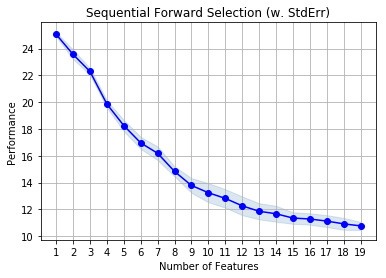

In [6]:
import myFeatureSelection as FS
X, Y , Xt , Yt , _ = FS.Preprocces.getPreProcData()
ret_f = [73, 81, 102, 127, 182, 280, 601, 606, 736, 803, 913, 934, 948, 963, 991, 1081, 1137, 1287, 1320, 1374, 1575, 1684, 1795, 1851, 1889, 2006, 2065, 2069, 2373, 2430, 2498, 2535, 2608, 2647, 2673, 2923, 2940, 2971, 3026, 3116, 3159, 3196, 3245, 3546, 3556, 3589, 3631, 3730, 3959, 3981]

xnew = X.iloc[:,ret_f] 
xtnew = Xt.iloc[:,ret_f]

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error , make_scorer


GBR_Params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
              'subsample':0.6, 'verbose':0, 'warm_start':True, 'alpha':0.6,
              'learning_rate': 0.03, 'loss': 'lad'}

def myMAD(y,y_pred):
    temp1 = 0
    temp2 = 0
    y = y.tolist()
    m = len(y)
    for i in range(m):
        dis = y[i] - y_pred[i]
        temp1 = temp1 + abs(dis)
    return temp1/m

clf = ensemble.GradientBoostingRegressor(**GBR_Params)
mad = make_scorer(myMAD)
feature_selector = SFS(clf , k_features=19 , forward=True , verbose=2 , scoring=mad, cv=3)

selected = feature_selector.fit(xnew,Y)
print selected
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
print selected.get_metric_dict()
fig = plot_sfs(selected.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [0]:
import myFeatureSelection as FS
import numpy as np
import pandas as pd
#import RAG as GN


X, Y , Xt , Yt ,colName = FS.Preprocces.getPreProcData()

# [4, 'F', 12424, 'R', 8661, 'A', 3375, 'G', 26]
# on train: 
# 3.8621405384324654
# on test: 
# 3.902018252911144
ret_f = [71, 124, 410, 909, 930, 944, 1072, 1130, 1276, 1567, 1648, 1785, 1878, 1994, 2060, 2130, 2182, 2358, 2409, 2627, 2893, 2919, 3098, 3141, 3261, 3366]

Params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
              'subsample':0.6, 'verbose':0, 'warm_start':True, 'alpha':0.6,
              'learning_rate': 0.03, 'loss': 'lad'}

Xnew = X.iloc[:,ret_f] 
xt = Xt.iloc[:,ret_f]
print ret_f
scoreCV = FS.Evaluations.GBR_with_MAD_CV(Xnew,Y,xt,Yt,Params,cv=3)
print "on train: ",scoreCV[0]
print "on test: ",scoreCV[1]

score = FS.Evaluations.GBR_with_MAD(Xnew,Y,xt,Yt,Params)
print "on train: ",score[0]
print "on test: ",score[1]


DataSet  DS097_270  :  [ column: 21291  , Row: 398 ]
DataSet  DS236_270  :  [ column: 21291  , Row: 93 ]
DataSet  DS242_270  :  [ column: 21291  , Row: 50 ]
DataSet  DS317_270  :  [ column: 21291  , Row: 168 ]
DataSet  DS642_270  :  [ column: 21291  , Row: 123 ]
DataSet  DS869_270  :  [ column: 21291  , Row: 24 ]
DataSet  DS257_270  :  [ column: 21291  , Row: 84 ]
DataSet  DS008_270  :  [ column: 21291  , Row: 92 ]
DataSet  DS149_450  :  [ column: 21291  , Row: 71 ]
DataSet  DS169_450  :  [ column: 21291  , Row: 95 ]
DataSet  DS638_450  :  [ column: 21291  , Row: 16 ]
DataSet  DS812_270  :  [ column: 21291  , Row: 48 ]
DataSet  DS064_450  :  [ column: 21291  , Row: 78 ]
DataSet  DS870_450  :  [ column: 21291  , Row: 40 ]
DataSet  DS128_450  :  [ column: 21291  , Row: 43 ]
DataSet  DS279_450  :  [ column: 21291  , Row: 656 ]
[ column: 21291  , Row: 2079 ]
[71, 124, 410, 909, 930, 944, 1072, 1130, 1276, 1567, 1648, 1785, 1878, 1994, 2060, 2130, 2182, 2358, 2409, 2627, 2893, 2919, 3098, 3

2  child ) [4, 'F', 12424, 'R', 8661, 'A', 3375, 'G', 26]
on train: 
3.8621405384324654
on test: 
3.902018252911144
Selected Feature:  [73L, 81L, 127L, 182L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1374L, 1516L, 1575L, 1795L, 1889L, 2006L, 2065L, 2069L, 2373L, 2647L, 2940L, 3116L, 3159L, 3245L]

16  child ) [4, 'F', 13855, 'R', 8487, 'A', 4400, 'G', 23]
on train: 
3.9791240623916395
on test: 
3.9427791667656833
Selected Feature:  [81L, 127L, 601L, 606L, 913L, 934L, 948L, 1081L, 1287L, 1386L, 1575L, 1795L, 1889L, 2647L, 2673L, 2940L, 3001L, 3116L, 3159L, 3631L, 3807L, 4098L, 4267L]


4  child ) [4, 'F', 12424, 'R', 4512, 'A', 3985, 'G', 31]
on train: 
3.910010787114427
on test: 
3.7811789697115943
Selected Feature:  [73L, 81L, 127L, 182L, 601L, 606L, 736L, 913L, 934L, 948L, 991L, 1081L, 1248L, 1287L, 1374L, 1575L, 1795L, 1889L, 2006L, 2065L, 2069L, 2373L, 2535L, 2647L, 2673L, 2940L, 3116L, 3159L, 3245L, 3546L, 3631L]

28  child ) [4, 'F', 10742, 'R', 9276, 'A', 3375, 'G', 24]
on train: 
3.9556994557069607
on test: 
3.9219015837807536
Selected Feature:  [73L, 81L, 127L, 182L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1248L, 1287L, 1374L, 1575L, 1795L, 1889L, 2006L, 2069L, 2647L, 2940L, 3116L, 3159L, 3245L]

26  child ) [4, 'F', 12424, 'R', 6732, 'A', 4364, 'G', 19]
on train: 
3.9919303978104304
on test: 
4.01209653114731
Selected Feature:  [81L, 127L, 601L, 606L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1795L, 1889L, 2647L, 2940L, 3116L, 3159L, 3631L, 4098L, 4267L]

14  child ) [3, 'R', 7011, 'A', 3822, 'G', 17]
on train: 
4.023101478343093
on test: 
4.030544123078326
Selected Feature:  [81L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1795L, 1889L, 2647L, 2940L, 3116L, 3159L, 3631L]


1  child ) [3, 'R', 8593, 'A', 3847, 'G', 31]
on train: 
3.872957529482291
on test: 
3.885721628098347
Selected Feature:  [73L, 81L, 127L, 182L, 601L, 606L, 736L, 774L, 913L, 934L, 948L, 1081L, 1287L, 1374L, 1575L, 1795L, 1889L, 2006L, 2065L, 2069L, 2373L, 2430L, 2647L, 2673L, 2940L, 3116L, 3159L, 3245L, 3546L, 3631L, 3844L]


25  child ) [3, 'R', 7407, 'A', 3383, 'G', 19]
on train: 
3.9981488814955566
on test: 
3.914445779750299
Selected Feature:  [81L, 127L, 182L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1795L, 1889L, 2006L, 2647L, 2940L, 3116L, 3159L]

8  child ) [3, 'R', 6631, 'A', 3895, 'G', 16]
on train: 
4.002291593087706
on test: 
4.024283881503378
Selected Feature:  [81L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1795L, 1889L, 2647L, 2940L, 3116L, 3159L]


2  child ) [3, 'R', 6827, 'A', 3710, 'G', 18]
on train: 
4.067897333719453
on test: 
4.00880952573727
Selected Feature:  [81L, 127L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1795L, 1889L, 2647L, 2940L, 3116L, 3159L, 3631L]

23  child ) [3, 'R', 8661, 'A', 3375, 'G', 21]
on train: 
3.99648058357659
on test: 
3.943019809042493
Selected Feature:  [81L, 127L, 182L, 601L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1795L, 1889L, 2006L, 2069L, 2647L, 2940L, 3116L, 3159L, 3245L]

28  child ) [4, 'F', 10788, 'P', 7765, 'A', 3804, 'RF', 15]
on train: 
4.198480460554106
on test: 
3.9872632330285587
Selected Feature:  [81L, 127L, 606L, 913L, 1081L, 1287L, 1559L, 1575L, 1889L, 2647L, 2940L, 3116L, 3159L, 3276L, 3631L]


26  child ) [3, 'P', 10250, 'A', 3297, 'G', 15]
on train: 
4.066650617601222
on test: 
4.037986866486325
Selected Feature:  [81L, 182L, 606L, 736L, 913L, 934L, 948L, 1081L, 1287L, 1575L, 1889L, 2647L, 2940L, 3116L, 3159L]


16  child ) [3, 'P', 10717, 'A', 3425, 'RF', 18]
on train: 
4.126430379525157
on test: 
4.019632123431626
Selected Feature:  [81L, 127L, 438L, 606L, 913L, 940L, 1081L, 1287L, 1559L, 1575L, 1889L, 2069L, 2647L, 2940L, 3116L, 3159L, 3276L, 3375L]

22  child ) [4, 'F', 12424, 'M', 9099, 'G', 4402, 'G', 14]
on train: 
4.199054444082081
on test: 
4.02697506179333
Selected Feature:  [81L, 606L, 913L, 1287L, 1575L, 1889L, 2647L, 2940L, 3116L, 3159L, 3631L, 4098L, 4267L, 4375L]

20  child ) [4, 'F', 15337, 'G', 12424, 'A', 2430, 'R', 19]
on train: 
4.869589654161474
on test: 
4.813740715543377
Selected Feature:  [7749L, 4267L, 4340L, 1575L, 12370L, 1889L, 81L, 1546L, 4875L, 2140L, 2889L, 73L, 1310L, 438L, 1660L, 1261L, 1479L, 8565L, 5182L]

30  child ) [4, 'A', 18899, 'R', 12241, 'A', 3611, 'RF', 21]
on train: 
4.073217546863992
on test: 
4.037697698892958
Selected Feature:  [73L, 81L, 127L, 606L, 895L, 913L, 940L, 991L, 1081L, 1287L, 1559L, 1575L, 1889L, 2069L, 2430L, 2647L, 2940L, 2990L, 3116L, 3159L, 3276L]

1  child ) [3, 'M', 11826, 'A', 1645, 'E', 22]
on train: 
5.293632972601562
on test: 
4.8950674081530865
Selected Feature:  [81L, 148L, 176L, 411L, 438L, 589L, 606L, 812L, 817L, 1076L, 1081L, 1094L, 1098L, 1168L, 1195L, 1287L, 1321L, 1325L, 1390L, 1405L, 1542L, 1616L]

27  child ) [3, 'M', 12665, 'G', 1717, 'R', 16]
on train: 
6.384882796834847
on test: 
6.322234199098235
Selected Feature:  [81L, 438L, 1310L, 1261L, 73L, 1479L, 1081L, 136L, 484L, 82L, 619L, 1333L, 1100L, 1135L, 7330L, 1405L]


24  child ) [4, 'G', 17116, 'R', 8316, 'F', 1532, 'R', 24]
on train: 
5.644996561737383
on test: 
5.3201796825636265
Selected Feature:  [2430, 1889, 81, 1546, 2140, 438, 73, 1479, 484, 136, 82, 2065, 2336, 3195, 1100, 1405, 804, 663, 242, 217, 257, 1770, 738, 814]